# NBA Prospect Three-Point Shooting Predictor

In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

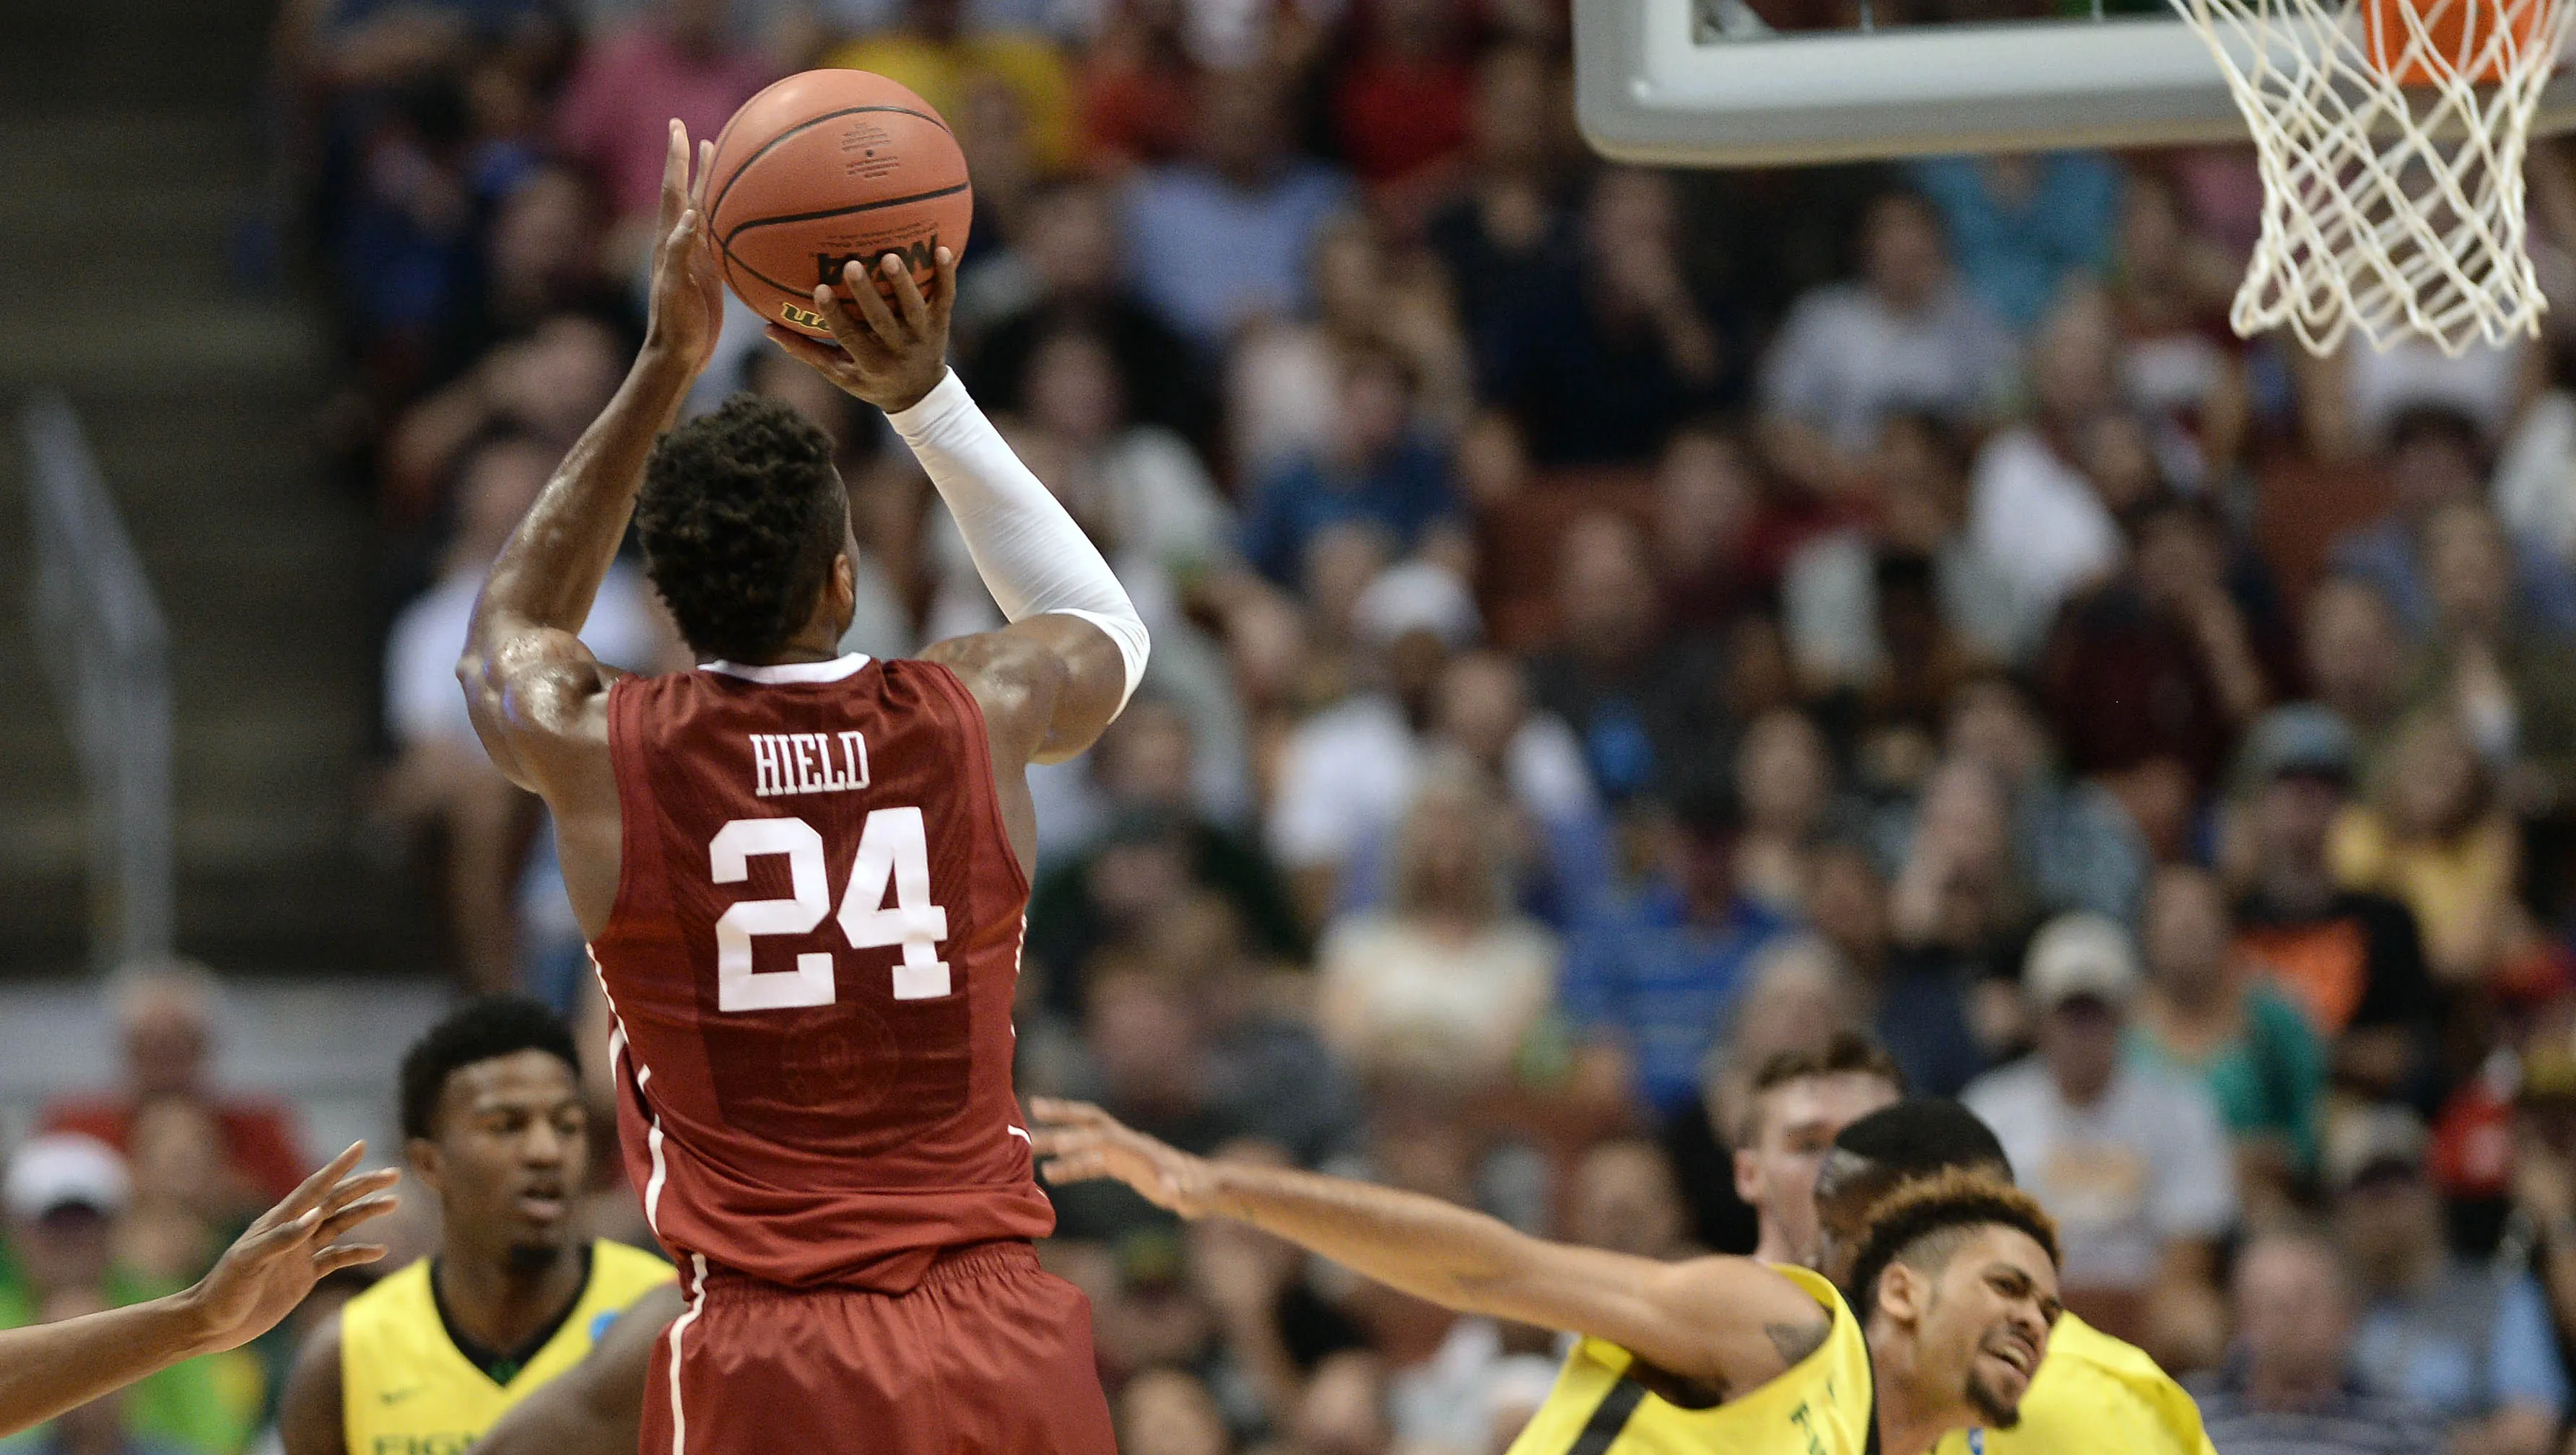

## Business Understanding

#### The Evolution of the NBA and the Rise of Three-Point Shooting

In the modern NBA, the [emphasis on three-point shooting has dramatically reshaped the game](https://www.nba.com/news/3-point-era-nba-75), altering team strategies and player development. This evolution has [elevated the importance of proficiency in three-point shooting](https://www.theringer.com/nba/2021/2/12/22279459/nba-make-miss-3-point-shooting) to an essential skill for players across all positions. Being adept at long-range shooting is now a critical factor in a player's career, influencing their ability to secure a spot on a team and potentially impacting their market value. As a result, NBA teams are [increasingly focusing on developing this skill in their players](https://www.cbssports.com/nba/news/thunder-hire-chip-engelland-nbas-top-shooting-coach-who-spent-17-years-with-spurs-per-report/), leveraging targeted training and analytics to enhance shooting effectiveness.

#### Challenges in Evaluating Three-Point Shooting Talent

As the NBA's emphasis on three-point shooting continues to grow, its impact on the draft and scouting processes has become increasingly significant. The ability of a prospect to shoot from long range is now a major factor in their overall evaluation, influencing how teams perceive their potential and future success in the league. Types of players who once thrived in the league because of their athleticism, size, playmaking abilities, or other elite traits, are often finding their value reduced as the ability to spread the floor and pose a threat from beyond the arc becomes more crucial. However, [accurately projecting a college player's three-point shooting ability to the NBA level is a challenging aspect of scouting](https://theboxandone.substack.com/p/can-we-trust-pre-draft-shooting-improvements#:~:text=Shooting%20is%20such%20an%20important,the%20ultimate%20mental%20torture%20chamber.). This difficulty arises because players' shooting performances can vary widely once they transition from college basketball to the professional stage. Some players may significantly improve their shooting due to advanced training methods and a focus on skill development, while others may struggle to replicate their college success or fail to develop their shooting abilities further.

[A key issue in this scouting dilemma is the relatively small sample size of three-point shooting attempts in college](https://fansided.com/2020/07/20/nba-draft-shooting-synopsis-volume-versatility/), which can lead to unstable and misleading percentages. College players often have shorter seasons and fewer games compared to the NBA, resulting in less data to analyze and a higher chance of variability in their shooting performance. This makes it hard for scouts and teams to confidently predict which players will continue to excel as three-point shooters, who will improve with time and training, and who might not transition their shooting skills effectively to the professional level. Despite the critical role of three-point shooting in determining a player's impact in the NBA, the unpredictability of shooting development post-college remains a significant challenge for teams looking to draft prospects with the potential to excel in today's game.

#### Predictive Modeling: A Solution to Three-Point Shooting Evaluation

Given the challenging and often unpredictable nature of assessing college prospects' three-point shooting capabilities for the NBA, this project aims to leverage predictive modeling and machine learning techniques to forecast a player's three-point shooting performance at the professional level. By utilizing a comprehensive dataset of college statistics from current NBA players, with their NBA three-point shooting percentages serving as the target variable, this approach seeks to identify patterns and predictors that may not be immediately apparent through traditional scouting methods.

The rationale behind employing predictive modeling lies in the inherent randomness and difficulty associated with evaluating three-point shooting potential. NBA front offices could greatly benefit from a methodology that offers a more accurate prediction of a prospect's ability to shoot from long range, based solely on statistical analysis. This would allow teams to allocate their scouting resources and attention more efficiently, focusing on assessing other aspects of a player's game that are less random and more observable through traditional evaluation methods, such as defensive skills and playmaking abilities.

By redirecting the focus away from the highly variable task of projecting three-point shooting potential—which has proven to be a complex and sometimes misleading aspect of player evaluation—teams can instead prioritize the scouting of skills and attributes that lend themselves to more consistent and qualitative analysis. This strategic shift in talent evaluation emphasizes the development and recognition of well-rounded players, while still acknowledging the critical role that three-point shooting plays in the modern NBA. Through this project, I aim to provide NBA front offices with a tool that enhances their ability to predict three-point shooting success, optimizing the draft and development process by using data-driven insights to complement traditional scouting expertise.



## Data Understanding

In this project, I aim to predict the NBA three-point shooting percentages of college basketball prospects. To achieve this, I have sourced and combined comprehensive datasets that encompass both NCAA player statistics and NBA player three-point shooting statistics. Understanding the structure, content, and quality of this data is crucial for my analysis and subsequent predictive modeling.

#### NCAA Player Statistics

The dataset for [NCAA player statistics was downloaded from BartTorvik.com](https://barttorvik.com/playerstat.php?link=y&year=2024&start=20231101&end=20240501), covering every NCAA season from 2007-08 to 2021-22. This dataset includes a wide range of player statistics, such as points per game, assists, rebounds, and, critically for my project, three-point shooting percentages. After downloading the CSV files for each season, they were merged into a single CSV file to create a comprehensive dataset. This consolidation process was essential for analyzing trends over time and ensuring a robust sample size for our predictive models. Importing this combined dataset into a pandas DataFrame allows for efficient data manipulation and analysis within a Python environment.

#### NBA Player Three-Point Shooting Statistics

For the NBA player statistics, I focused on three-point shooting data from the regular seasons spanning from 2008-09 through the current season, as I only had access to college player data beginning in the 2007-08 season. This data was [sourced from Stathead.com](https://stathead.com/basketball/player-season-finder.cgi), specifically selecting players with a minimum of 82 games played to ensure I am considering only those with a significant amount of playtime, thereby improving the reliability of the three-point percentage as a metric. This dataset provides a critical linkage to the NCAA dataset, as it enables us to compare college performance with NBA outcomes, focusing on the aspect of three-point shooting. Most of the statistics in this data set will be Per 100 possessions, as we will need this to update the target variable, as I will explain in detail in the Data Cleaning section.

#### Caveats and Considerations
An important caveat of this project is the exclusion of international prospects and players from the G-League Ignite who are increasingly making up a significant portion of NBA draft picks each season. This exclusion is due to the unavailability of comparable and consistent data for these groups that align with the NCAA dataset. This limitation means the predictive model may not fully capture the broader spectrum of talent entering the NBA, as the pathways for developing basketball players continue to diversify beyond traditional college basketball.

In [2]:
#Reading in my NCAA Player Data to pandas

ncaa_df = pd.read_csv('Data/college_player_barttorvik_stats.csv')

/var/folders/xf/v57vst_15dj4zfhxbmdlrdmm0000gn/T/ipykernel_67510/1978910493.py:3: DtypeWarning: Columns (27,64) have mixed types. Specify dtype option on import or set low_memory=False.
  ncaa_df = pd.read_csv('Data/college_player_barttorvik_stats.csv')


In [3]:
ncaa_df.head()

,Player,Team,Conference,GP,MPG,ORtg,USG,eFG%,TS%,ORB%,...,DG_BPM,OREB_PG,DREB_PG,REB_PG,AST_PG,STL_PG,BLK_PG,PTS_PG,Position_Advanced,3PT/100
0,Jalen Coleman-Lands,Kansas,B12,39,19.8,113.0,19.6,60.6,61.75,4.2,...,0.763975,0.2821,0.4615,0.7436,0.3333,0.1795,0.1026,3.6923,Wing G,12.06140
1,K.J. Walton,Akron,MAC,4,5.9,90.9,20.3,58.8,59.77,5.0,...,1.126700,1.1667,2.0000,3.1667,1.3333,1.3333,0.0000,7.3333,Wing G,0.00000
2,Camron Justice,Western Kentucky,CUSA,28,76.5,105.7,23.5,53.5,57.00,0.5,...,-0.657743,0.1333,3.2333,3.3667,3.2000,1.6000,0.0667,14.7333,Combo G,11.95290
3,Traci Carter,Hartford,AE,22,51.2,91.1,22.4,43.2,46.06,2.2,...,-0.421078,0.5455,3.3636,3.9091,2.7727,1.6364,0.4545,9.6364,Scoring PG,9.25142
4,Shaheed Medlock,DePaul,BE,4,0.6,0.0,0.0,0.0,0.00,0.0,...,-1.273520,0.0000,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [4]:
ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70661 entries, 0 to 70660
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             70661 non-null  object 
 1   Team               70661 non-null  object 
 2   Conference         70661 non-null  object 
 3   GP                 70661 non-null  int64  
 4   MPG                70661 non-null  float64
 5   ORtg               70661 non-null  float64
 6   USG                70661 non-null  float64
 7   eFG%               70661 non-null  float64
 8   TS%                70661 non-null  float64
 9   ORB%               70661 non-null  float64
 10  DRB%               70661 non-null  float64
 11  AST%               70661 non-null  float64
 12  TO%                70661 non-null  float64
 13  FTM                70661 non-null  int64  
 14  FTA                70661 non-null  int64  
 15  FT%                70661 non-null  float64
 16  2P                 706

In [5]:
#Reading in my NBA Player Data to pandas

nba_df = pd.read_csv('Data/nba_career_stats_threepoint_analysis.csv')

In [6]:
nba_df.head()

,Player,3PA,G,From,To,Age,G.1,GS,AS,FG,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,Team
0,Alex Abrines,595,174,2016-17,2018-19,23-25,174,16,0,5.4,...,5.1,16.2,0.387,0.443,0.368,0.880,0.552,0.525,G-F,OKC
1,Precious Achiuwa,325,231,2020-21,2023-24,21-24,231,47,0,8.0,...,4.7,20.0,0.473,0.519,0.308,0.604,0.526,0.507,F,"MIA,NYK,TOR"
2,Quincy Acy,523,337,2012-13,2018-19,22-28,337,60,0,5.4,...,6.2,15.2,0.444,0.506,0.350,0.759,0.553,0.513,F-C,"BRK,DAL,NYK,PHO,SAC,TOR"
3,Steven Adams,15,706,2013-14,2022-23,20-29,706,641,0,7.0,...,4.5,16.7,0.587,0.589,0.067,0.536,0.591,0.587,C,"MEM,NOP,OKC"
4,Bam Adebayo,73,456,2017-18,2023-24,20-26,456,352,2,9.7,...,4.2,25.2,0.547,0.554,0.123,0.758,0.599,0.548,C-F,MIA


In [7]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  942 non-null    object 
 1   3PA     942 non-null    int64  
 2   G       942 non-null    int64  
 3   From    942 non-null    object 
 4   To      942 non-null    object 
 5   Age     942 non-null    object 
 6   G.1     942 non-null    int64  
 7   GS      942 non-null    int64  
 8   AS      942 non-null    int64  
 9   FG      942 non-null    float64
 10  FGA     942 non-null    float64
 11  2P      942 non-null    float64
 12  2PA     942 non-null    float64
 13  3P      942 non-null    float64
 14  3PA.1   942 non-null    float64
 15  FT      942 non-null    float64
 16  FTA     942 non-null    float64
 17  ORB     942 non-null    float64
 18  DRB     942 non-null    float64
 19  TRB     942 non-null    float64
 20  AST     942 non-null    float64
 21  STL     942 non-null    float64
 22  BL

## Data Preparation

### Target Engineering

When assessing NBA three-point shooting skill, it's crucial to recognize that not all three-point shots are created equal. A simple three-point shooting percentage, while useful, doesn't fully capture a player's shooting ability. This metric can be misleading, as it doesn't account for the context in which shots are taken. Players who only attempt three-pointers when wide open may have inflated percentages compared to those who frequently shoot under more challenging conditions.

To address this discrepancy and create a more nuanced target variable for our predictive modeling, I have refined the traditional three-point shooting percentage. Our engineered target metric adjusts a player's three-point percentage by considering the volume of three-pointers attempted per 100 possessions. This adjustment acknowledges that players who shoot more often are likely taking harder shots, thus providing a better indicator of true shooting skill.

Additionally, I have introduced a slight adjustment factor based on the total number of three-point attempts a player has taken over their career. This factor is rooted in the principle that a larger sample size of shot attempts offers a more stable and reliable measure of a player's three-point shooting talent. It accounts for the variability and noise in shooting percentages, especially in cases where players have fewer attempts. Essentially, our engineered target variable aims to balance percentage accuracy with shot difficulty and confidence in a player's shooting ability derived from their attempt volume.

This methodological refinement ensures that our predictive model considers not just how accurately players shoot from beyond the arc, but also the context of their shooting—leading to a more accurate assessment of three-point shooting skill in the NBA.

##### Step 1: Volume-Adjustment based on League-Average Three-Point Attempts per 100 Offensive Possesions


In the first step to refine the target variable for predicting NBA three-point shooting skill, the dataset nba_player_df was enhanced with a new feature named Weighting Factor. This factor is calculated by dividing each player's three-point attempts per game (3PA_PG) by the average number of three-point attempts per 100 possessions across all players (average_3pa_per_100). This step aims to quantify the relative volume of three-point shots a player takes in the context of their team's offensive possesions.

Following this, a Volume-Adjusted 3P% was introduced, leveraging the previously calculated Weighting Factor. This new metric adjusts a player's three-point shooting percentage (3P%) by scaling it according to their Weighting Factor, incorporating an adjustment coefficient (alpha = .33). The adjustment essentially amplifies or reduces the original shooting percentage based on whether a player shoots more or less frequently than the average, with the intent of acknowledging the difficulty and frequency of shots taken. This approach offers a nuanced perspective on three-point shooting skill, emphasizing not just accuracy, but also the shot selection and challenges faced by players.





In [8]:
#Seeing which columns we will need

nba_df.columns

Index(['Player', '3PA', 'G', 'From', 'To', 'Age', 'G.1', 'GS', 'AS', 'FG',
       'FGA', '2P', '2PA', '3P', '3PA.1', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%',
       'TS%', 'eFG%', 'Pos', 'Team'],
      dtype='object')

In [9]:
nba_df[['3PA','3PA.1']].describe()

#Based on the numbers, 3PA column is career attempts, while 3PA.1 is Attempts Per 100 Possessions

,3PA,3PA.1
count,942.000000,942.000000
mean,1005.237792,5.671550
std,1121.519145,3.141139
min,10.000000,0.000000
25%,217.250000,3.400000
50%,583.500000,5.900000
75%,1478.500000,8.000000
max,8406.000000,14.700000


In [10]:
#Rename the columns accordingly

nba_df.rename(columns={'3PA': '3PA_Career'}, inplace=True)

nba_df.rename(columns={'3PA.1': '3PA_100'}, inplace=True)

In [11]:
#Getting the average 3PA Per 100 Possessions based on the Players in our data set
#We will use this to calculate volume-adjusted 3P%

average_3pa_per_100 = nba_df['3PA_100'].mean()

average_3pa_per_100

5.671549893842887

In [12]:
#Calculating volume-adjusted 3P%

nba_df['Weighting Factor'] = nba_df['3PA_100'] / average_3pa_per_100

alpha = .33  

nba_df['Volume-Adjusted 3P%'] = nba_df['3P%'] * (1 + alpha * (nba_df['Weighting Factor'] - 1))

In [13]:
# Now I will look at the top 20 players in pure 3P% compared to the top 20 players in Volume-Adjusted 3P%

top20_column1 = nba_df[['Player', '3P%', '3PA_100', '3PA_Career']].sort_values(by='3P%', ascending=False).head(20)

top20_column2 = nba_df[['Player', 'Volume-Adjusted 3P%', '3PA_100',  '3PA_Career']].sort_values(by='Volume-Adjusted 3P%', ascending=False).head(20)

#Reset index for neat printing
top20_column1.reset_index(drop=True, inplace=True)
top20_column2.reset_index(drop=True, inplace=True)

print("Top 20 for Column1:\n", top20_column1)
print("\nTop 20 for Column2:\n", top20_column2)

Top 20 for Column1:
                 Player    3P%  3PA_100  3PA_Career
0         Tony Bradley  0.500      0.3          12
1          Kyle Korver  0.439      9.4        3909
2     Kelenna Azubuike  0.438      4.5         240
3         Luke Kennard  0.437      9.5        1695
4           Joe Harris  0.436      9.2        2353
5           Seth Curry  0.432      8.7        1973
6          Steve Novak  0.430     12.4        1227
7        Stephen Curry  0.426     12.9        8406
8          Matt Bonner  0.423      8.2        1357
9           Sam Hauser  0.418     12.6         643
10          Steve Nash  0.418      4.6        1037
11      Anthony Morrow  0.417      8.0        1937
12        Desmond Bane  0.417     10.5        1521
13         J.J. Redick  0.415      9.9        4563
14         Mike Miller  0.415      6.6        1209
15       Klay Thompson  0.414     11.2        5689
16       José Calderón  0.413      5.6        1958
17  Zydrunas Ilgauskas  0.413      0.8          63
18  Michae

Drawing on domain knowledge, the Volume-Adjusted 3P% metric emerges as a superior indicator of three-point shooting prowess. For instance, Stephen Curry, widely acknowledged as the greatest three-point shooter in history, ascends from 8th place based on traditional 3P% to the top position when considering Volume-Adjusted 3P%. Conversely, Tony Bradley, who leads in three-point percentage, experiences a significant drop in the rankings due to his low rate of 0.3 three-point attempts per 100 possessions. Bradley, primarily a center who rarely shoots from beyond the arc, has only attempted 12 three-pointers in his career, suggesting that his 50% success rate is more likely a result of small-sample variance rather than genuine shooting skill. Another notable example is Kelenna Azubuike, recognized as a proficient three-point shooter but not among the elite. While he ranks fourth in traditional 3P%, his position drops out of the Top 20 in Volume-Adjusted 3P% due to taking only 4.5 three-point shots per 100 possessions throughout his career. This adjustment reflects a more nuanced understanding of a player's ability to shoot three-pointers, accounting for both accuracy and the difficulty level of the shots attempted.

##### Step 2: Adding a Career Volume Adjustment Factor

As mentioned, I will also introduce an adjustment factor considering a player's career three-point attempts (3PA_Career). I first calculated the median of all players' 3PA_Career as our average benchmark. Then, I defined a slight adjustment factor (0.001) to modify each player's volume-adjusted three-point percentage based on their shooting volume relative to this median. I calculated a weight for each player inversely related to their career attempts, indicating higher confidence in their shooting percentage with more attempts. This weight was used to adjust their volume-adjusted percentage, factoring in both the volume above or below the median and a small, weighted adjustment to account for the player's experience. Any negative adjusted percentages were set to zero, ensuring all values remained realistic. 

In [14]:
# Calculate the median 3PA
median_3PA = nba_df['3PA_Career'].median()

# Define the adjustment factor
adjustment_factor = 0.001  # Adjust as needed

# Function to calculate the weight based on career attempts
def calculate_weight(player_row):
    # Calculate a weight based on career attempts
    weight = 1 / (1 + player_row['3PA_Career'])
    return weight

# Apply the weight calculation function to the df
nba_df['Weight'] = nba_df.apply(calculate_weight, axis=1)

# Function to calculate the Confidence and Volume-Adjusted 3P% with weighted adjustment
def calculate_adjusted_3P_percentage(player_row):
    # Calculate the difference between the player's 3PA and the average_3PA
    difference = player_row['3PA_Career'] - median_3PA
    
    # Calculate the weight-adjusted adjustment based on the difference and adjustment_factor
    adjustment = difference * adjustment_factor * player_row['Weight']
    
    # Calculate the adjusted 3P% by adding or subtracting the adjustment
    adjusted_percentage = player_row['Volume-Adjusted 3P%'] + adjustment
    
    return adjusted_percentage

# Apply the adjusted 3P% calculation function to the DataFrame
nba_df['Confidence and Volume-Adjusted 3P%'] = nba_df.apply(calculate_adjusted_3P_percentage, axis=1)

#Any negative values become 0. Can't have a negative %, and any player who shot that poorly or infrequently should be treated the same.
nba_df['Confidence and Volume-Adjusted 3P%'] = nba_df['Confidence and Volume-Adjusted 3P%'].apply(lambda x: max(0, x))

sorted_confidence_threep_df = nba_df.sort_values(by='Confidence and Volume-Adjusted 3P%', ascending=False)
sorted_confidence_threep_df = sorted_confidence_threep_df.reset_index(drop=True)
sorted_confidence_threep_df[['Player', 'Confidence and Volume-Adjusted 3P%', 'Volume-Adjusted 3P%', '3P%', '3PA_100', '3PA_Career']].head(20)

,Player,Confidence and Volume-Adjusted 3P%,Volume-Adjusted 3P%,3P%,3PA_100,3PA_Career
0,Stephen Curry,0.606101,0.605171,0.426,12.9,8406
1,Steve Novak,0.598867,0.598343,0.430,12.4,1227
2,Duncan Robinson,0.588463,0.587709,0.399,13.8,2377
3,Sam Hauser,0.586602,0.586510,0.418,12.6,643
4,Troy Daniels,0.580103,0.579519,0.395,13.7,1404
5,Buddy Hield,0.565862,0.564990,0.401,12.7,4582
6,Isaiah Joe,0.558265,0.557945,0.396,12.7,859
7,Dāvis Bertāns,0.556847,0.556131,0.398,12.5,2058
8,Lindy Waters III,0.556053,0.556742,0.365,14.7,345
9,Klay Thompson,0.548070,0.547173,0.414,11.2,5689


In [15]:
#Let's see whose percentages changed the most with our confidence adjustment

# Calculate the absolute difference between Volume-Adjusted 3P% and Confidence and Volume-Adjusted 3P%
nba_df['Percentage Change'] = (nba_df['Confidence and Volume-Adjusted 3P%'] - nba_df['Volume-Adjusted 3P%']).abs()

# Sort the DataFrame by the absolute difference in descending order to see the players with the largest changes
sorted_changes_df = nba_df.sort_values(by='Percentage Change', ascending=False)

# Select the top players with the largest changes along with relevant columns for review
top_changes = sorted_changes_df[['Player', 'Volume-Adjusted 3P%', 'Confidence and Volume-Adjusted 3P%', 'Percentage Change']]

# Ensure '3PA_Career' is included in the DataFrame before filtering
top_changes_with_attempts = sorted_changes_df[['Player', 'Volume-Adjusted 3P%', 'Confidence and Volume-Adjusted 3P%', 'Percentage Change', '3PA_Career']]

# Now, when you select for display, '3PA_Career' will be present
players_change_with_attempts = top_changes_with_attempts[['Player', '3PA_Career', 'Percentage Change']]

# Display the top 20 players with their '3PA_Career' and percentage change
print(players_change_with_attempts.head(20))


              Player  3PA_Career  Percentage Change
574  Dominic McGuire          10           0.052136
96      Andrew Bogut          10           0.052136
274      Jeff Foster          12           0.043962
684      Johan Petro          12           0.043962
539       Sean Marks          12           0.043962
941      Ivica Zubac          12           0.043962
779      Craig Smith          12           0.043962
107     Tony Bradley          12           0.043962
359  Trenton Hassell          13           0.040750
463   DeAndre Jordan          13           0.040750
786        Joe Smith          14           0.037967
465      Chris Kaman          14           0.037967
89       Tarik Black          14           0.037967
793   Tiago Splitter          14           0.037967
921      Jeff Withey          14           0.037967
640     Nerlens Noel          15           0.035531
710        Ivan Rabb          15           0.035531
3       Steven Adams          15           0.035531
13       Lav

As expected, the players with the lowest career 3PA have the highest percentage change in 3P%, which was the goal of the career volume confidence adjustment.

### Cleaning the NCAA Data

The process of cleaning the NCAA player dataset started with the elimination of entries for college athletes sharing names with NBA players, or NBA players who were in college before the 2007-08 season (the first season I have college data), but share a name with player(s) in college between the 2007-08 and 2021-22 seasons. This ensured a distinct set of individuals for analysis. This initial step resulted in a curated list of 559 unique players.

Subsequent efforts focused on consolidating the data for athletes with multiple seasons of college play. This was achieved by aggregating individual season statistics into a single row per player. To further refine the dataset, statistical percentages from each player's final college season were assigned increased significance compared to earlier seasons. This approach was predicated on the rationale that a player's most recent performance is likely a more accurate indicator of their current abilities and potential future success.

In [16]:
player_list = nba_df['Player'].tolist()

In [17]:
#Filtering my NCAA Player Data to only get players whose names match my NBA Data

ncaa_filtered_df = ncaa_df[ncaa_df['Player'].isin(player_list)]

In [18]:
pd.set_option("display.max_rows", None)

In [19]:
#Checking to see how many times a player's name appears in my new dataset

ncaa_filtered_df['Player'].value_counts()

#Need to filter out different players with the same names who are not actually in my NBA player data

Player
Anthony Johnson             16
Jalen Johnson               15
Chris Johnson               15
Cameron Johnson             15
James Johnson               12
Justin Jackson              11
Mike Scott                  11
Marcus Thornton             11
Jordan Bell                  8
Ryan Anderson                8
Gary Clark                   8
Jalen Williams               8
Jordan McRae                 7
Lance Thomas                 7
Josh Smith                   7
Isaiah Thomas                7
Isaiah Jackson               6
Matt Thomas                  6
James Anderson               6
Tyler Johnson                6
Jordan Hill                  6
Derrick Williams             6
Kyle Anderson                6
Terrence Williams            6
Jordan Hamilton              6
Caleb Martin                 6
Ian Clark                    5
Joe Harris                   5
Damion Lee                   5
Devin Booker                 5
Tristan Thompson             5
Jaylin Williams              5
T

In [20]:
# Players to exclude directly. These are NBA players who share a name with one or more other college players in our ncaa data set, but 
# they themselves played in college before the 2008 season (when our ncaa data begins)
exclude_players = ['Anthony Johnson', 'Josh Smith', 'Bobby Brown', 'Mo Williams', 'Tony Parker', 'Devin Brown',
                   'Marvin Williams', 'Devin Harris', 'Ryan Gomes', 'Willie Green', 'Jason Williams', 'Tim Thomas',
                   'Nate Robinson', 'Mike James', 'Will Bynum', 'Ivan Johnson', 'James Jones', 'Jason Smith']


#This excludes ncaa players who share a name with NBA players in our data set. 
#I filtered based on college using domain knowledge and web searching
conditional_exclusions = {
    'Chris Johnson': ['Dayton'],
    'Cameron Johnson': ['North Carolina', 'Pittsburgh'],
    'Jalen Johnson': ['Duke'],
    'James Johnson': ['Wake Forest'],
    'Justin Jackson': ['North Carolina'],
    'Mike Scott': ['Virginia'],
    'Jordan Bell': ['Oregon'],
    'Jalen Williams': ['Santa Clara'],
    'Marcus Thornton': ['LSU'],
    'Ryan Anderson': ['California'],
    'Gary Clark': ['Cincinnati'],
    'Jordan McRae': ['Tennessee'],
    'Isaiah Thomas': ['Washington'],
    'Lance Thomas': ['Duke'],
    'Caleb Martin': ['North Carolina St.', 'Nevada'],
    'Matt Thomas': ['Iowa St.'],
    'Jordan Hamilton': ['Texas'],
    'Kyle Anderson': ['UCLA'],
    'Terrence Williams': ['Louisville'],
    'Tyler Johnson': ['Fresno St.'],
    'Isaiah Jackson': ['Kentucky'],
    'Derrick Williams': ['Arizona'],
    'Jordan Hill': ['Arizona'],
    'James Anderson': ['Oklahoma St.'],
    'Devin Booker': ['Kentucky'],
    'Ian Clark': ['Belmont'],
    'Jaylin Williams': ['Arkansas'],
    'Joe Harris': ['Virginia'],
    'Tristan Thompson': ['Texas'],
    'Reggie Jackson': ['Boston College'],
    'A.J. Price': ['Connecticut'],
    'Brandon Rush': ['Kansas'],
    'Gary Harris': ['Michigan St.'],
    'Dion Waiters': ['Syracuse'],
    'Darnell Jackson': ['Kansas'],
    'Josh Jackson': ['Kansas'],
}


In [21]:
# Apply direct exclusions
ncaa_filtered_df = ncaa_filtered_df[~ncaa_filtered_df['Player'].isin(exclude_players)]

# Apply conditional exclusions
for player, teams in conditional_exclusions.items():
    ncaa_filtered_df = ncaa_filtered_df[~((ncaa_filtered_df['Player'] == player) & ~ncaa_filtered_df['Team'].isin(teams))]

In [22]:
#Make sure every name is filtered correctly

ncaa_filtered_df['Player'].value_counts()

Player
Mike Scott                  5
Cameron Johnson             5
Tim Frazier                 5
Damion Lee                  5
Dorian Finney-Smith         4
Georges Niang               4
Fred VanVleet               4
Caris LeVert                4
Ron Baker                   4
Jake Layman                 4
Denzel Valentine            4
Buddy Hield                 4
Bryn Forbes                 4
Ryan Arcidiacono            4
Tyrone Wallace              4
Abdel Nader                 4
Malcolm Brogdon             4
Shaquille Harrison          4
T.J. McConnell              4
Chasson Randle              4
Pat Connaughton             4
Larry Nance Jr.             4
Josh Richardson             4
Quinn Cook                  4
Darrun Hilliard             4
Frank Kaminsky              4
Royce O'Neale               4
Andrew Nembhard             4
Kris Dunn                   4
Ochai Agbaji                4
Treveon Graham              4
Alex Caruso                 4
Keita Bates-Diop            4
Jev

In [23]:
pd.reset_option("display.max_rows", None)

In [24]:
ncaa_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 890 to 70511
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             1327 non-null   object 
 1   Team               1327 non-null   object 
 2   Conference         1327 non-null   object 
 3   GP                 1327 non-null   int64  
 4   MPG                1327 non-null   float64
 5   ORtg               1327 non-null   float64
 6   USG                1327 non-null   float64
 7   eFG%               1327 non-null   float64
 8   TS%                1327 non-null   float64
 9   ORB%               1327 non-null   float64
 10  DRB%               1327 non-null   float64
 11  AST%               1327 non-null   float64
 12  TO%                1327 non-null   float64
 13  FTM                1327 non-null   int64  
 14  FTA                1327 non-null   int64  
 15  FT%                1327 non-null   float64
 16  2P                 1327 no

In [25]:
ncaa_filtered_df.head(10)

,Player,Team,Conference,GP,MPG,ORtg,USG,eFG%,TS%,ORB%,...,DG_BPM,OREB_PG,DREB_PG,REB_PG,AST_PG,STL_PG,BLK_PG,PTS_PG,Position_Advanced,3PT/100
890,Ochai Agbaji,Kansas,B12,39,84.6,114.0,23.3,57.0,59.49,2.8,...,1.661260,0.8205,4.2308,5.0513,1.5897,0.9231,0.5641,18.7692,Wing G,10.65950
965,Andrew Nembhard,Gonzaga,WCC,32,80.4,117.3,19.6,53.4,56.38,1.6,...,2.977620,0.4375,2.9375,3.3750,5.7500,1.5938,0.1250,11.8438,Scoring PG,6.98783
1500,Jalen Williams,Santa Clara,WCC,33,86.7,116.1,24.9,56.2,60.12,2.0,...,0.865106,0.5758,3.8485,4.4242,4.1515,1.1818,0.5455,18.0000,Combo G,5.21124
1882,David Roddy,Colorado St.,MWC,30,82.1,119.1,28.8,63.4,64.87,7.3,...,2.278560,1.8387,5.6774,7.5161,2.8710,1.1935,1.0323,19.2903,Wing F,6.32734
2163,Jason Thompson,Houston Christian,Slnd,9,9.3,84.6,14.2,57.7,58.19,8.4,...,-2.955190,0.7273,1.5455,2.2727,0.7273,0.5455,0.0909,2.5455,Wing F,2.37390
2470,Christian Braun,Kansas,B12,40,85.1,114.1,20.2,55.6,58.49,4.9,...,2.811360,1.4000,5.1250,6.5250,2.7750,0.9750,0.8250,14.1000,Wing G,5.52882
2679,Tari Eason,LSU,SEC,33,58.8,115.7,30.8,55.9,61.52,10.5,...,5.079460,2.2727,4.3333,6.6061,1.0000,1.9697,1.1515,16.9394,Wing F,5.49759
2779,Jabari Walker,Colorado,P12,33,69.8,106.7,27.0,51.3,56.96,8.9,...,1.387310,2.0606,7.3333,9.3939,1.2424,0.7273,0.6667,14.6364,PF/C,6.56846
2914,Walker Kessler,Auburn,SEC,34,63.0,122.6,19.0,62.7,62.69,10.9,...,7.356450,2.6176,5.4118,8.0294,0.8824,1.0882,4.5000,11.4412,C,3.22319
3326,Jaden Ivey,Purdue,B10,36,75.7,111.6,27.7,53.4,57.96,2.7,...,0.963820,0.6667,4.2222,4.8889,3.0556,0.9167,0.5556,17.3333,Wing G,9.43351


In [26]:
ncaa_filtered_df.describe()

,GP,MPG,ORtg,USG,eFG%,TS%,ORB%,DRB%,AST%,TO%,...,OG_BPM,DG_BPM,OREB_PG,DREB_PG,REB_PG,AST_PG,STL_PG,BLK_PG,PTS_PG,3PT/100
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,...,1327.000000,1327.000000,1327.000000,1327.000000,1327.00000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
mean,32.142427,66.878523,109.967973,22.617332,52.628937,56.160867,6.136172,14.927054,15.596684,17.055162,...,3.628876,2.082159,1.403407,3.727521,5.13093,2.291350,1.051332,0.672807,12.622504,6.226183
std,5.814768,19.917399,11.351709,4.642638,6.625664,6.185559,3.837699,5.216388,8.730907,4.709608,...,3.002735,1.614167,0.892890,1.588357,2.28053,1.577529,0.533747,0.677390,5.015890,3.913322
min,2.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-15.247100,-6.737060,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,57.550000,104.000000,19.300000,48.950000,52.990000,2.900000,11.100000,9.200000,14.000000,...,1.988760,1.067745,0.693350,2.671200,3.51565,1.151500,0.666700,0.218800,9.327950,3.161070
50%,33.000000,73.100000,110.600000,22.500000,52.600000,56.390000,5.200000,14.100000,13.500000,16.600000,...,3.804210,1.979270,1.200000,3.540500,4.80000,1.906200,0.971400,0.459500,12.857100,6.360400
75%,35.000000,81.000000,117.400000,26.000000,56.600000,59.915000,8.900000,18.250000,20.900000,19.500000,...,5.559880,3.040715,2.000000,4.677400,6.53450,3.064250,1.350700,0.863500,16.159100,9.040260
max,41.000000,94.500000,140.600000,38.400000,100.000000,76.920000,23.200000,37.300000,51.400000,57.400000,...,12.800800,8.376190,5.750000,10.542900,14.40000,9.939400,3.444400,5.258100,29.305600,26.078500


In [27]:
ncaa_filtered_df.columns

Index(['Player', 'Team', 'Conference', 'GP', 'MPG', 'ORtg', 'USG', 'eFG%',
       'TS%', 'ORB%', 'DRB%', 'AST%', 'TO%', 'FTM', 'FTA', 'FT%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'BLK%', 'STL%', 'FTR', 'Class', 'Height',
       'Number', 'PORPAG', 'Adj_O_Eff', 'Foul_rate', 'Year', 'ID', 'Hometown',
       'Recruiting_Rank', 'A_TO_Rate', 'Rim_Made', 'Rim_Missed', 'Mid_Made',
       'Mid_Missed', 'Rim%', 'Mid%', 'Dunks', 'Dunks_Attempts', 'Dunk%',
       'Draft_Spot', 'DRTG', 'Adj_DRTG', 'D_PORPAG', 'stops', 'BPM', 'O_BPM',
       'D_BPM', 'G_BPM', 'MPG.1', 'OG_BPM', 'DG_BPM', 'OREB_PG', 'DREB_PG',
       'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'PTS_PG', 'Position_Advanced',
       '3PT/100'],
      dtype='object')

### Feature Selection and Engineering

For feature selection, I looked for metrics that are directly associated with shooting ability, including three-point shooting percentages, free throw percentages, and mid-range shooting percentages. These statistics serve as direct indicators of a player's shooting skill.

Beyond specific shooting metrics, a broader set of offensive statistics were retained to capture overall offensive capabilities, which could indirectly predict future shooting success. This includes points per game, which reflects scoring ability, as well as advanced metrics like PORPAG (Points Over Replacement Player per Adjusted Game), O_BPM (Offensive Box Plus-Minus), and Adjusted Offensive Efficiency. These measures offer a nuanced view of a player's offensive contribution and efficiency.

Additionally, other secondary statistics such as block percentage (BLK%), defensive rebounding percentage (DRB%), and assist percentage (AST%) were considered. These metrics, while not directly related to shooting, may provide insights into a player's athleticism, basketball IQ, and overall offensive skill set, all of which can influence shooting development.

Recruiting Rank was also be included in the analysis and further transformed into a binary variable to explore its potential correlation, whether negative or positive, with shooting skill. This reflects the hypothesis that higher-ranked college recruits may possess attributes conducive to or detracting from effective shooting.

Furthermore, Games Played and Class are selected to account for the extent of college experience and its impact on the statistical representation of a player's abilities. The inclusion of player names and year will facilitate further feature engineering and analysis, although will not be among the final features.

By carefully selecting these features, I aim to encompass a comprehensive array of factors that contribute to shooting effectiveness, thereby enhancing the model's predictive accuracy for NBA 3-point shooting percentages.

In [28]:
# Remove columns I know I will not be using as features

ncaa_filtered_columns_df = ncaa_filtered_df.drop(columns = ['Team', 'Conference', 'MPG', 'eFG%', '2P', '2PA', '2P%', 'FTR', 'Number', 'Foul_rate', 'ID', 'Hometown', 'A_TO_Rate', 'Rim_Made', 'Rim_Missed', 'Rim%', 'Dunks', 'Dunks_Attempts', 'Dunk%',
'Draft_Spot', 'DRTG', 'Adj_DRTG', 'D_PORPAG','stops', 'BPM', 'D_BPM', 'G_BPM', 'MPG.1', 'OG_BPM', 'DG_BPM', 'OREB_PG', 'DREB_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'TO%', 'Position_Advanced', 'Mid_Made', 'Mid_Missed', 'ORB%', 'STL%', 'ORtg', 'TS%'])

In [29]:
ncaa_filtered_columns_df.head(10)

,Player,GP,USG,DRB%,AST%,FTM,FTA,FT%,3P,3PA,...,Class,Height,PORPAG,Adj_O_Eff,Year,Recruiting_Rank,Mid%,O_BPM,PTS_PG,3PT/100
890,Ochai Agbaji,39,23.3,12.9,8.7,113,152,0.743,103,253,...,Sr,6-5,5.170890,128.3210,2022,73.6,0.2857,5.57528,18.7692,10.65950
965,Andrew Nembhard,32,19.6,8.7,26.3,48,55,0.873,51,133,...,Sr,6-5,3.936060,120.6730,2022,95.6,0.4200,5.03041,11.8438,6.98783
1500,Jalen Williams,33,24.9,11.7,22.7,114,141,0.809,42,106,...,Jr,6-6,5.052000,127.3710,2022,52.0,0.3926,4.63169,18.0000,5.21124
1882,David Roddy,30,28.8,20.8,19.8,102,147,0.694,45,103,...,Jr,6-5,5.869280,136.9250,2022,19.4,0.5161,6.34517,19.2903,6.32734
2163,Jason Thompson,9,14.2,18.8,3.9,4,7,0.571,1,4,...,Jr,6-7,-0.305813,76.5848,2022,NaN,0.5000,-5.49844,2.5455,2.37390
2470,Christian Braun,40,20.2,16.0,14.5,99,135,0.733,51,132,...,Jr,6-6,4.541690,123.8580,2022,74.2,0.3667,5.28388,14.1000,5.52882
2679,Tari Eason,33,30.8,19.8,10.1,151,188,0.803,28,78,...,So,6-8,4.488570,138.7600,2022,75.4,0.3378,4.94707,16.9394,5.49759
2779,Jabari Walker,33,27.0,29.3,10.0,127,162,0.784,36,104,...,So,6-9,3.275570,119.2200,2022,69.0,0.3538,1.32909,14.6364,6.56846
2914,Walker Kessler,34,19.0,22.1,7.0,53,89,0.596,10,50,...,So,7-1,3.613450,126.7400,2022,96.0,0.3158,3.54240,11.4412,3.22319
3326,Jaden Ivey,36,27.7,15.0,19.2,154,207,0.744,64,179,...,So,6-4,4.532870,127.3740,2022,84.4,0.2900,4.45468,17.3333,9.43351


In [30]:
ncaa_filtered_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 890 to 70511
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           1327 non-null   object 
 1   GP               1327 non-null   int64  
 2   USG              1327 non-null   float64
 3   DRB%             1327 non-null   float64
 4   AST%             1327 non-null   float64
 5   FTM              1327 non-null   int64  
 6   FTA              1327 non-null   int64  
 7   FT%              1327 non-null   float64
 8   3P               1327 non-null   int64  
 9   3PA              1327 non-null   int64  
 10  3P%              1327 non-null   float64
 11  BLK%             1327 non-null   float64
 12  Class            1327 non-null   object 
 13  Height           1327 non-null   object 
 14  PORPAG           1327 non-null   float64
 15  Adj_O_Eff        1327 non-null   float64
 16  Year             1327 non-null   int64  
 17  Recruiting_Rank 

In [31]:
#Changing Class to Numerical value to later use as a numerical feature

class_mapping = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4}
ncaa_filtered_columns_df['Class'] = ncaa_filtered_columns_df['Class'].map(class_mapping)

In [32]:
# Handling our Null Values in Recruiting_Rank column
# We will assume the Null Values are for unranked high school prospects
# We will make the column binary based on if 
# player was highly ranked as a college recruit, which we will be defined by 90th percentile and higher recruits

ncaa_filtered_columns_df['Recruiting_Rank'].fillna(0, inplace=True)

ncaa_filtered_columns_df['Recruiting_Rank'] = ncaa_filtered_columns_df['Recruiting_Rank'].apply(lambda rank: 1 if rank >= 90 else 0)

ncaa_filtered_columns_df['Recruiting_Rank']

890      0
965      1
1500     0
1882     0
2163     0
        ..
70386    1
70403    1
70412    0
70424    0
70511    0
Name: Recruiting_Rank, Length: 1327, dtype: int64

In [33]:
# Split the 'Height' column into 'Feet' and 'Inches' using the '-' delimiter
height_split = ncaa_filtered_columns_df['Height'].str.split('-', expand=True)

# Create 'Feet' and 'Inches' columns
ncaa_filtered_columns_df['Feet'] = height_split[0].astype(int)
ncaa_filtered_columns_df['Inches'] = height_split[1].astype(int)

# Calculate the total height in inches and store it in a new column
ncaa_filtered_columns_df['Height (inches)'] = ncaa_filtered_columns_df['Feet'] * 12 + ncaa_filtered_columns_df['Inches']

# Drop the original 'Height', 'Feet', and 'Inches' columns
ncaa_filtered_columns_df = ncaa_filtered_columns_df.drop(['Height', 'Feet', 'Inches'], axis=1)

# Display the resulting DataFrame
ncaa_filtered_columns_df['Height (inches)']

890      77
965      77
1500     78
1882     77
2163     79
         ..
70386    74
70403    78
70412    79
70424    72
70511    79
Name: Height (inches), Length: 1327, dtype: int64

### NCAA Data Consolidation and Weighting

In the dataset preparation, multiple seasons of a player's college basketball data are consolidated into a single entry to provide a comprehensive view of their collegiate career. To underscore the significance of the most recent season, which likely reflects current skills and potential, the final season's statistics are duplicated, thereby weighting these figures more heavily in the analysis. Moreover, for essential shooting metrics such as 3-point and free throw percentages (3PT% and FT%), the calculation is adjusted to factor in the total number of games played. This adjustment ensures that these percentages offer a precise measure of a player's shooting effectiveness. 

In [34]:
ncaa_filtered_columns_df['3P_U'] = ncaa_filtered_columns_df['3P']
ncaa_filtered_columns_df['FTM_U'] = ncaa_filtered_columns_df['FTM']

In [35]:
ncaa_filtered_columns_df['Final_Season_GP'] = ncaa_filtered_columns_df.groupby('Player')['GP'].transform('first')
ncaa_filtered_columns_df['Final_Season_3P'] = ncaa_filtered_columns_df.groupby('Player')['3P'].transform('first')
ncaa_filtered_columns_df['Final_Season_FTM'] = ncaa_filtered_columns_df.groupby('Player')['FTM'].transform('first')

In [36]:
# Find players that appear more than once
players_to_duplicate = ncaa_filtered_columns_df['Player'].value_counts()[ncaa_filtered_columns_df['Player'].value_counts() > 1].index

# Create a DataFrame with the first row for each player to duplicate
first_rows_to_duplicate = ncaa_filtered_columns_df[ncaa_filtered_columns_df['Player'].isin(players_to_duplicate)].groupby('Player').head(1).copy()

# Concatenate the original DataFrame with the duplicated and modified first rows
ncaa_filtered_columns_df = pd.concat([ncaa_filtered_columns_df, first_rows_to_duplicate], ignore_index=True)

# Display the extended DataFrame
ncaa_filtered_columns_df


,Player,GP,USG,DRB%,AST%,FTM,FTA,FT%,3P,3PA,...,Mid%,O_BPM,PTS_PG,3PT/100,Height (inches),3P_U,FTM_U,Final_Season_GP,Final_Season_3P,Final_Season_FTM
0,Ochai Agbaji,39,23.3,12.9,8.7,113,152,0.743,103,253,...,0.2857,5.575280,18.7692,10.65950,77,103,113,39,103,113
1,Andrew Nembhard,32,19.6,8.7,26.3,48,55,0.873,51,133,...,0.4200,5.030410,11.8438,6.98783,77,51,48,32,51,48
2,Jalen Williams,33,24.9,11.7,22.7,114,141,0.809,42,106,...,0.3926,4.631690,18.0000,5.21124,78,42,114,33,42,114
3,David Roddy,30,28.8,20.8,19.8,102,147,0.694,45,103,...,0.5161,6.345170,19.2903,6.32734,77,45,102,30,45,102
4,Jason Thompson,9,14.2,18.8,3.9,4,7,0.571,1,4,...,0.5000,-5.498440,2.5455,2.37390,79,1,4,9,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,Jodie Meeks,36,27.9,8.6,11.7,211,234,0.902,117,288,...,NaN,5.824600,23.7222,13.20730,77,117,211,36,117,211
1706,Ish Smith,29,18.2,9.7,25.3,30,38,0.789,7,29,...,NaN,0.533862,6.1724,2.38787,72,7,30,29,7,30
1707,MarShon Brooks,32,22.7,11.0,12.5,54,79,0.684,40,128,...,NaN,4.120110,10.5625,10.02370,77,40,54,32,40,54
1708,A.J. Price,34,24.4,9.2,28.5,88,122,0.721,78,196,...,NaN,4.882350,14.5882,10.51670,74,78,88,34,78,88


In [37]:

# Define a list of columns to multiply by 'GP'
columns_to_multiply_sans_GP = ['BLK%', 'DRB%', 'AST%', 'FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'USG', 'FTA']

# Multiply the columns by 'GP'

for col in columns_to_multiply_sans_GP:
     ncaa_filtered_columns_df[col] = ncaa_filtered_columns_df[col] * ncaa_filtered_columns_df['GP']
    
ncaa_filtered_columns_df


def aggregate_player_stats(group):
    aggregated_data = {}
    sum_columns = ['BLK%', 'DRB%', 'AST%', 'GP','FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'USG', 'FTA', '3P_U', 'FTM_U']
    for col in sum_columns:
        aggregated_data[col] = group[col].sum()
        
    uniform_columns = ['Recruiting_Rank', 'Class', 'Year', 'Height (inches)', 'Final_Season_GP', 'Final_Season_FTM', 'Final_Season_3P']
    for col in uniform_columns:
        aggregated_data[col] = group[col].iloc[0]

    return pd.Series(aggregated_data)
    
aggregated_ncaa_df = ncaa_filtered_columns_df.groupby('Player').apply(aggregate_player_stats).reset_index()

aggregated_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,A.J. Price,9.9,892.9,3129.3,101.0,73.646,39.241,403.70646,12314.0540,0.0000,...,12982.0,208.0,282.0,1.0,4.0,2009.0,74.0,34.0,88.0,78.0
1,AJ Griffin,85.8,526.5,265.2,39.0,30.888,17.433,134.60655,4929.7950,16.2903,...,2067.0,71.0,42.0,1.0,1.0,2022.0,78.0,39.0,42.0,71.0
2,Aaron Gordon,129.2,733.4,494.0,38.0,16.036,13.528,108.76664,4372.4320,9.7698,...,6840.0,16.0,76.0,1.0,1.0,2014.0,80.0,38.0,76.0,16.0
3,Aaron Holiday,93.4,1165.8,3527.0,134.0,106.460,56.518,482.54568,15934.6212,50.1572,...,19484.0,268.0,470.0,0.0,3.0,2018.0,73.0,33.0,159.0,88.0
4,Aaron Nesmith,140.0,942.8,538.8,60.0,49.500,25.400,223.08984,7140.8840,20.8340,...,4324.0,179.0,170.0,0.0,2.0,2020.0,78.0,14.0,52.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zach Collins,382.2,904.8,171.6,39.0,28.977,18.564,100.59543,5106.3090,19.8315,...,5772.0,10.0,110.0,1.0,1.0,2017.0,84.0,39.0,110.0,10.0
555,Zach LaVine,29.6,351.5,466.2,37.0,25.567,13.875,68.11626,4076.3270,15.2366,...,2516.0,48.0,47.0,1.0,1.0,2014.0,77.0,37.0,47.0,48.0
556,Zeke Nnaji,105.6,652.8,185.6,32.0,24.320,9.408,141.82624,4078.6880,14.5184,...,6400.0,5.0,152.0,1.0,1.0,2020.0,83.0,32.0,152.0,5.0
557,Ziaire Williams,44.0,328.0,328.0,20.0,15.920,5.820,19.73892,1912.8260,7.2000,...,980.0,23.0,39.0,1.0,1.0,2021.0,80.0,20.0,39.0,23.0


In [38]:
aggregated_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            559 non-null    object 
 1   BLK%              559 non-null    float64
 2   DRB%              559 non-null    float64
 3   AST%              559 non-null    float64
 4   GP                559 non-null    float64
 5   FT%               559 non-null    float64
 6   3P%               559 non-null    float64
 7   PORPAG            559 non-null    float64
 8   Adj_O_Eff         559 non-null    float64
 9   Mid%              559 non-null    float64
 10  O_BPM             559 non-null    float64
 11  PTS_PG            559 non-null    float64
 12  3PT/100           559 non-null    float64
 13  FTM               559 non-null    float64
 14  3PA               559 non-null    float64
 15  3P                559 non-null    float64
 16  USG               559 non-null    float64
 1

In [39]:
columns_to_divide = ['BLK%', 'DRB%', 'AST%', 'FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P','USG', 'FTA']
# Divide each statistic column by the total games played
for col in columns_to_divide:
    aggregated_ncaa_df[col] = aggregated_ncaa_df[col] / aggregated_ncaa_df['GP']

aggregated_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,A.J. Price,0.098020,8.840594,30.983168,101.0,0.729168,0.388525,3.997094,121.921327,0.000000,...,128.534653,208.0,282.0,1.0,4.0,2009.0,74.0,34.0,88.0,78.0
1,AJ Griffin,2.200000,13.500000,6.800000,39.0,0.792000,0.447000,3.451450,126.405000,0.417700,...,53.000000,71.0,42.0,1.0,1.0,2022.0,78.0,39.0,42.0,71.0
2,Aaron Gordon,3.400000,19.300000,13.000000,38.0,0.422000,0.356000,2.862280,115.064000,0.257100,...,180.000000,16.0,76.0,1.0,1.0,2014.0,80.0,38.0,76.0,16.0
3,Aaron Holiday,0.697015,8.700000,26.320896,134.0,0.794478,0.421776,3.601087,118.915084,0.374307,...,145.402985,268.0,470.0,0.0,3.0,2018.0,73.0,33.0,159.0,88.0
4,Aaron Nesmith,2.333333,15.713333,8.980000,60.0,0.825000,0.423333,3.718164,119.014733,0.347233,...,72.066667,179.0,170.0,0.0,2.0,2020.0,78.0,14.0,52.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zach Collins,9.800000,23.200000,4.400000,39.0,0.743000,0.476000,2.579370,130.931000,0.508500,...,148.000000,10.0,110.0,1.0,1.0,2017.0,84.0,39.0,110.0,10.0
555,Zach LaVine,0.800000,9.500000,12.600000,37.0,0.691000,0.375000,1.840980,110.171000,0.411800,...,68.000000,48.0,47.0,1.0,1.0,2014.0,77.0,37.0,47.0,48.0
556,Zeke Nnaji,3.300000,20.400000,5.800000,32.0,0.760000,0.294000,4.432070,127.459000,0.453700,...,200.000000,5.0,152.0,1.0,1.0,2020.0,83.0,32.0,152.0,5.0
557,Ziaire Williams,2.200000,16.400000,16.400000,20.0,0.796000,0.291000,0.986946,95.641300,0.360000,...,49.000000,23.0,39.0,1.0,1.0,2021.0,80.0,20.0,39.0,23.0


In [40]:
#Create Accurate 3P% and FT% columns
# Calculate 3P% (3-point percentage)
aggregated_ncaa_df['3P%'] = (aggregated_ncaa_df['3P'] / aggregated_ncaa_df['3PA']) * 100

# Calculate FT% (free throw percentage)
aggregated_ncaa_df['FT%'] = (aggregated_ncaa_df['FTM'] / aggregated_ncaa_df['FTA']) * 100



In [41]:
#This will get the correct games played
aggregated_ncaa_df['GP'] = aggregated_ncaa_df['GP'] - aggregated_ncaa_df['Final_Season_GP']
aggregated_ncaa_df['GP'] = aggregated_ncaa_df.apply(lambda row: row['GP'] + row['Final_Season_GP'] if row['GP'] == 0 else row['GP'], axis=1)

aggregated_ncaa_df['3P_U'] = aggregated_ncaa_df['3P_U'] - aggregated_ncaa_df['Final_Season_3P']
aggregated_ncaa_df['3P_U'] = aggregated_ncaa_df.apply(lambda row: row['3P_U'] + row['Final_Season_3P'] if row['3P_U'] == 0 else row['3P_U'], axis=1)

aggregated_ncaa_df['FTM_U'] = aggregated_ncaa_df['FTM_U'] - aggregated_ncaa_df['Final_Season_FTM']
aggregated_ncaa_df['FTM_U'] = aggregated_ncaa_df.apply(lambda row: row['FTM_U'] + row['Final_Season_FTM'] if row['FTM_U'] == 0 else row['FTM_U'], axis=1)

aggregated_ncaa_df


,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,A.J. Price,0.098020,8.840594,30.983168,67.0,73.039593,39.041210,3.997094,121.921327,0.000000,...,128.534653,130.0,194.0,1.0,4.0,2009.0,74.0,34.0,88.0,78.0
1,AJ Griffin,2.200000,13.500000,6.800000,39.0,79.245283,44.654088,3.451450,126.405000,0.417700,...,53.000000,71.0,42.0,1.0,1.0,2022.0,78.0,39.0,42.0,71.0
2,Aaron Gordon,3.400000,19.300000,13.000000,38.0,42.222222,35.555556,2.862280,115.064000,0.257100,...,180.000000,16.0,76.0,1.0,1.0,2014.0,80.0,38.0,76.0,16.0
3,Aaron Holiday,0.697015,8.700000,26.320896,101.0,80.630261,42.382979,3.601087,118.915084,0.374307,...,145.402985,180.0,311.0,0.0,3.0,2018.0,73.0,33.0,159.0,88.0
4,Aaron Nesmith,2.333333,15.713333,8.980000,46.0,82.516189,40.453515,3.718164,119.014733,0.347233,...,72.066667,119.0,118.0,0.0,2.0,2020.0,78.0,14.0,52.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zach Collins,9.800000,23.200000,4.400000,39.0,74.324324,47.619048,2.579370,130.931000,0.508500,...,148.000000,10.0,110.0,1.0,1.0,2017.0,84.0,39.0,110.0,10.0
555,Zach LaVine,0.800000,9.500000,12.600000,37.0,69.117647,37.500000,1.840980,110.171000,0.411800,...,68.000000,48.0,47.0,1.0,1.0,2014.0,77.0,37.0,47.0,48.0
556,Zeke Nnaji,3.300000,20.400000,5.800000,32.0,76.000000,29.411765,4.432070,127.459000,0.453700,...,200.000000,5.0,152.0,1.0,1.0,2020.0,83.0,32.0,152.0,5.0
557,Ziaire Williams,2.200000,16.400000,16.400000,20.0,79.591837,29.113924,0.986946,95.641300,0.360000,...,49.000000,23.0,39.0,1.0,1.0,2021.0,80.0,20.0,39.0,23.0


In [42]:
aggregated_ncaa_df = aggregated_ncaa_df.drop(columns = ['3PA', 'FTA', 'Final_Season_GP', 'Final_Season_3P', 'Final_Season_FTM', '3P', '3PA', 'FTM'])

In [43]:
aggregated_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,O_BPM,PTS_PG,3PT/100,USG,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches)
0,A.J. Price,0.098020,8.840594,30.983168,67.0,73.039593,39.041210,3.997094,121.921327,0.000000,5.522419,14.554416,9.557913,24.171287,130.0,194.0,1.0,4.0,2009.0,74.0
1,AJ Griffin,2.200000,13.500000,6.800000,39.0,79.245283,44.654088,3.451450,126.405000,0.417700,5.878550,10.384600,9.819310,16.900000,71.0,42.0,1.0,1.0,2022.0,78.0
2,Aaron Gordon,3.400000,19.300000,13.000000,38.0,42.222222,35.555556,2.862280,115.064000,0.257100,2.890220,12.368400,2.350110,23.200000,16.0,76.0,1.0,1.0,2014.0,80.0
3,Aaron Holiday,0.697015,8.700000,26.320896,101.0,80.630261,42.382979,3.601087,118.915084,0.374307,3.382671,15.776115,7.716124,24.501493,180.0,311.0,0.0,3.0,2018.0,73.0
4,Aaron Nesmith,2.333333,15.713333,8.980000,46.0,82.516189,40.453515,3.718164,119.014733,0.347233,3.444165,16.616640,11.912107,21.620000,119.0,118.0,0.0,2.0,2020.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zach Collins,9.800000,23.200000,4.400000,39.0,74.324324,47.619048,2.579370,130.931000,0.508500,2.581490,10.000000,1.747390,24.800000,10.0,110.0,1.0,1.0,2017.0,84.0
555,Zach LaVine,0.800000,9.500000,12.600000,37.0,69.117647,37.500000,1.840980,110.171000,0.411800,2.461770,9.432400,8.061630,19.000000,48.0,47.0,1.0,1.0,2014.0,77.0
556,Zeke Nnaji,3.300000,20.400000,5.800000,32.0,76.000000,29.411765,4.432070,127.459000,0.453700,2.735380,16.093800,0.988768,24.100000,5.0,152.0,1.0,1.0,2020.0,83.0
557,Ziaire Williams,2.200000,16.400000,16.400000,20.0,79.591837,29.113924,0.986946,95.641300,0.360000,-1.892370,10.700000,8.169930,25.800000,23.0,39.0,1.0,1.0,2021.0,80.0


In [44]:
aggregated_ncaa_df = aggregated_ncaa_df.rename(columns={'3P_U': '3P', 'FTM_U': 'FTM'})

In [45]:
aggregated_ncaa_df.columns

Index(['Player', 'BLK%', 'DRB%', 'AST%', 'GP', 'FT%', '3P%', 'PORPAG',
       'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'USG', '3P', 'FTM',
       'Recruiting_Rank', 'Class', 'Year', 'Height (inches)'],
      dtype='object')

In [46]:
aggregated_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           559 non-null    object 
 1   BLK%             559 non-null    float64
 2   DRB%             559 non-null    float64
 3   AST%             559 non-null    float64
 4   GP               559 non-null    float64
 5   FT%              559 non-null    float64
 6   3P%              543 non-null    float64
 7   PORPAG           559 non-null    float64
 8   Adj_O_Eff        559 non-null    float64
 9   Mid%             559 non-null    float64
 10  O_BPM            559 non-null    float64
 11  PTS_PG           559 non-null    float64
 12  3PT/100          559 non-null    float64
 13  USG              559 non-null    float64
 14  3P               559 non-null    float64
 15  FTM              559 non-null    float64
 16  Recruiting_Rank  559 non-null    float64
 17  Class           

In [47]:
# Our last nulls come from aggregating the ncaa player rows in 3P%, when we divided by 0.
# We will change these these to zeroes

aggregated_ncaa_df = aggregated_ncaa_df.fillna(0)

aggregated_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           559 non-null    object 
 1   BLK%             559 non-null    float64
 2   DRB%             559 non-null    float64
 3   AST%             559 non-null    float64
 4   GP               559 non-null    float64
 5   FT%              559 non-null    float64
 6   3P%              559 non-null    float64
 7   PORPAG           559 non-null    float64
 8   Adj_O_Eff        559 non-null    float64
 9   Mid%             559 non-null    float64
 10  O_BPM            559 non-null    float64
 11  PTS_PG           559 non-null    float64
 12  3PT/100          559 non-null    float64
 13  USG              559 non-null    float64
 14  3P               559 non-null    float64
 15  FTM              559 non-null    float64
 16  Recruiting_Rank  559 non-null    float64
 17  Class           

In [48]:
aggregated_ncaa_df.describe()

,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,O_BPM,PTS_PG,3PT/100,USG,3P,FTM,Recruiting_Rank,Class,Year,Height (inches)
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,2.959871,15.358424,15.758036,76.302326,73.615679,33.194641,3.523339,120.235792,0.306997,3.719432,13.707790,6.149345,23.423056,86.771020,205.606440,0.481216,2.588551,2015.014311,78.379249
std,2.888872,5.120247,8.412950,38.670928,8.514579,11.630789,1.189369,9.998696,0.138143,2.148742,3.685987,3.693258,3.805289,79.156719,123.040173,0.500095,1.207330,4.117426,3.164997
min,0.000000,5.433333,1.800000,3.000000,29.545455,0.000000,-0.609312,69.166128,0.000000,-4.063430,1.689700,0.000000,13.763087,0.000000,7.000000,0.000000,1.000000,2008.000000,69.000000
25%,1.000000,11.406105,9.373777,37.000000,69.297906,30.286180,2.699706,114.369960,0.271532,2.429806,11.184820,3.203550,20.789198,26.000000,115.500000,0.000000,1.000000,2012.000000,76.000000
50%,2.000000,14.542857,13.419469,69.000000,74.534645,35.365854,3.469373,120.318231,0.350406,3.850997,13.617980,6.305950,23.307362,63.000000,188.000000,0.000000,3.000000,2015.000000,78.000000
75%,3.966754,18.799206,20.495000,109.000000,79.617674,38.899264,4.277754,126.070271,0.396595,5.071708,16.106318,8.752635,25.939988,127.000000,278.000000,1.000000,4.000000,2018.000000,81.000000
max,18.300000,32.840506,51.400000,152.000000,93.548387,100.000000,7.000580,152.844000,0.533300,10.157100,27.674662,19.153673,38.400000,349.000000,721.000000,1.000000,4.000000,2022.000000,86.000000


In [49]:
# Combining our Aggregated NCAA df with the Adjusted 3P%
final_df = pd.merge(aggregated_ncaa_df, 
                     nba_df[['Player', 'Confidence and Volume-Adjusted 3P%']], 
                     on='Player')
                    
final_df.rename(columns={'Confidence and Volume-Adjusted 3P%': 'NBA Adjusted 3P%'}, inplace=True)

final_df


,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,PTS_PG,3PT/100,USG,3P,FTM,Recruiting_Rank,Class,Year,Height (inches),NBA Adjusted 3P%
0,A.J. Price,0.098020,8.840594,30.983168,67.0,73.039593,39.041210,3.997094,121.921327,0.000000,...,14.554416,9.557913,24.171287,130.0,194.0,1.0,4.0,2009.0,74.0,0.377353
1,AJ Griffin,2.200000,13.500000,6.800000,39.0,79.245283,44.654088,3.451450,126.405000,0.417700,...,10.384600,9.819310,16.900000,71.0,42.0,1.0,1.0,2022.0,78.0,0.451211
2,Aaron Gordon,3.400000,19.300000,13.000000,38.0,42.222222,35.555556,2.862280,115.064000,0.257100,...,12.368400,2.350110,23.200000,16.0,76.0,1.0,1.0,2014.0,80.0,0.321484
3,Aaron Holiday,0.697015,8.700000,26.320896,101.0,80.630261,42.382979,3.601087,118.915084,0.374307,...,15.776115,7.716124,24.501493,180.0,311.0,0.0,3.0,2018.0,73.0,0.405262
4,Aaron Nesmith,2.333333,15.713333,8.980000,46.0,82.516189,40.453515,3.718164,119.014733,0.347233,...,16.616640,11.912107,21.620000,119.0,118.0,0.0,2.0,2020.0,78.0,0.439384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zach Collins,9.800000,23.200000,4.400000,39.0,74.324324,47.619048,2.579370,130.931000,0.508500,...,10.000000,1.747390,24.800000,10.0,110.0,1.0,1.0,2017.0,84.0,0.316108
555,Zach LaVine,0.800000,9.500000,12.600000,37.0,69.117647,37.500000,1.840980,110.171000,0.411800,...,9.432400,8.061630,19.000000,48.0,47.0,1.0,1.0,2014.0,77.0,0.452363
556,Zeke Nnaji,3.300000,20.400000,5.800000,32.0,76.000000,29.411765,4.432070,127.459000,0.453700,...,16.093800,0.988768,24.100000,5.0,152.0,1.0,1.0,2020.0,83.0,0.360624
557,Ziaire Williams,2.200000,16.400000,16.400000,20.0,79.591837,29.113924,0.986946,95.641300,0.360000,...,10.700000,8.169930,25.800000,23.0,39.0,1.0,1.0,2021.0,80.0,0.356213


In [50]:
df = final_df

In [51]:
df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,PTS_PG,3PT/100,USG,3P,FTM,Recruiting_Rank,Class,Year,Height (inches),NBA Adjusted 3P%
0,A.J. Price,0.098020,8.840594,30.983168,67.0,73.039593,39.041210,3.997094,121.921327,0.000000,...,14.554416,9.557913,24.171287,130.0,194.0,1.0,4.0,2009.0,74.0,0.377353
1,AJ Griffin,2.200000,13.500000,6.800000,39.0,79.245283,44.654088,3.451450,126.405000,0.417700,...,10.384600,9.819310,16.900000,71.0,42.0,1.0,1.0,2022.0,78.0,0.451211
2,Aaron Gordon,3.400000,19.300000,13.000000,38.0,42.222222,35.555556,2.862280,115.064000,0.257100,...,12.368400,2.350110,23.200000,16.0,76.0,1.0,1.0,2014.0,80.0,0.321484
3,Aaron Holiday,0.697015,8.700000,26.320896,101.0,80.630261,42.382979,3.601087,118.915084,0.374307,...,15.776115,7.716124,24.501493,180.0,311.0,0.0,3.0,2018.0,73.0,0.405262
4,Aaron Nesmith,2.333333,15.713333,8.980000,46.0,82.516189,40.453515,3.718164,119.014733,0.347233,...,16.616640,11.912107,21.620000,119.0,118.0,0.0,2.0,2020.0,78.0,0.439384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zach Collins,9.800000,23.200000,4.400000,39.0,74.324324,47.619048,2.579370,130.931000,0.508500,...,10.000000,1.747390,24.800000,10.0,110.0,1.0,1.0,2017.0,84.0,0.316108
555,Zach LaVine,0.800000,9.500000,12.600000,37.0,69.117647,37.500000,1.840980,110.171000,0.411800,...,9.432400,8.061630,19.000000,48.0,47.0,1.0,1.0,2014.0,77.0,0.452363
556,Zeke Nnaji,3.300000,20.400000,5.800000,32.0,76.000000,29.411765,4.432070,127.459000,0.453700,...,16.093800,0.988768,24.100000,5.0,152.0,1.0,1.0,2020.0,83.0,0.360624
557,Ziaire Williams,2.200000,16.400000,16.400000,20.0,79.591837,29.113924,0.986946,95.641300,0.360000,...,10.700000,8.169930,25.800000,23.0,39.0,1.0,1.0,2021.0,80.0,0.356213


## Feature Exploration

In [52]:
numerical_columns = df.drop(columns=["Player"])

In [53]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

target_correlation = correlation_matrix["NBA Adjusted 3P%"]

sorted_correlations = target_correlation.sort_values(ascending=False)

print(sorted_correlations)

NBA Adjusted 3P%    1.000000
3PT/100             0.685864
FT%                 0.560292
3P                  0.537653
3P%                 0.384465
O_BPM               0.292084
PORPAG              0.164723
PTS_PG              0.145706
Year                0.143835
Adj_O_Eff           0.126763
AST%                0.123801
GP                  0.101901
Mid%                0.096157
Class               0.072985
FTM                 0.022788
USG                -0.024253
Recruiting_Rank    -0.120075
DRB%               -0.351561
Height (inches)    -0.357303
BLK%               -0.465042
Name: NBA Adjusted 3P%, dtype: float64


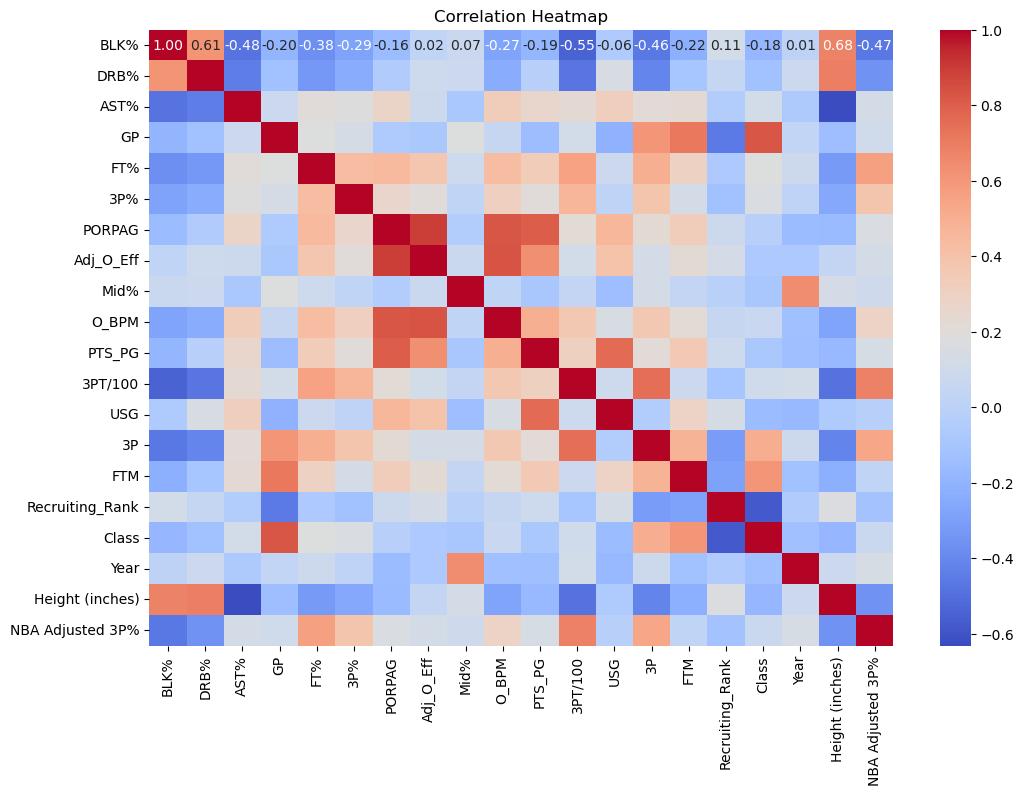

In [54]:
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
df.drop(columns = 'Player').corr()

,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,O_BPM,PTS_PG,3PT/100,USG,3P,FTM,Recruiting_Rank,Class,Year,Height (inches),NBA Adjusted 3P%
BLK%,1.000000,0.614991,-0.480426,-0.195347,-0.375913,-0.286713,-0.158642,0.023173,0.074364,-0.274820,-0.186039,-0.545221,-0.060945,-0.463985,-0.223446,0.114952,-0.181757,0.011595,0.677294,-0.465042
DRB%,0.614991,1.000000,-0.442885,-0.126910,-0.335811,-0.240594,-0.057698,0.092883,0.079707,-0.240563,-0.020793,-0.477376,0.152136,-0.412080,-0.097896,0.049269,-0.126311,0.081098,0.690576,-0.351561
AST%,-0.480426,-0.442885,1.000000,0.081667,0.207413,0.186149,0.277970,0.083973,-0.082110,0.329881,0.256915,0.229732,0.318867,0.212636,0.232079,-0.051254,0.118327,-0.069481,-0.631509,0.123801
GP,-0.195347,-0.126910,0.081667,1.000000,0.182004,0.138619,-0.063063,-0.082809,0.181387,0.056034,-0.151404,0.117765,-0.216694,0.605640,0.713781,-0.456975,0.821793,0.034268,-0.142602,0.101901
FT%,-0.375913,-0.335811,0.207413,0.182004,1.000000,0.426628,0.442942,0.377057,0.090244,0.427900,0.340559,0.557416,0.077971,0.498129,0.304871,-0.076613,0.179699,0.083192,-0.324147,0.560292
3P%,-0.286713,-0.240594,0.186149,0.138619,0.426628,1.000000,0.266074,0.203471,0.021862,0.311956,0.209229,0.466891,0.017306,0.385306,0.126351,-0.123900,0.164300,0.017683,-0.256662,0.384465
PORPAG,-0.158642,-0.057698,0.277970,-0.063063,0.442942,0.266074,1.000000,0.892401,-0.045381,0.827041,0.807959,0.220998,0.461617,0.225102,0.327108,0.088627,-0.019823,-0.158355,-0.163355,0.164723
Adj_O_Eff,0.023173,0.092883,0.083973,-0.082809,0.377057,0.203471,0.892401,1.000000,0.071584,0.830544,0.632065,0.116710,0.396522,0.125125,0.223268,0.132765,-0.071980,-0.072204,0.043159,0.126763
Mid%,0.074364,0.079707,-0.082110,0.181387,0.090244,0.021862,-0.045381,0.071584,1.000000,0.023498,-0.087587,0.041538,-0.146840,0.125101,0.039249,-0.016375,-0.086395,0.642857,0.127183,0.096157
O_BPM,-0.274820,-0.240563,0.329881,0.056034,0.427900,0.311956,0.827041,0.830544,0.023498,1.000000,0.500349,0.365051,0.148207,0.367072,0.216204,0.055084,0.063340,-0.128305,-0.275031,0.292084


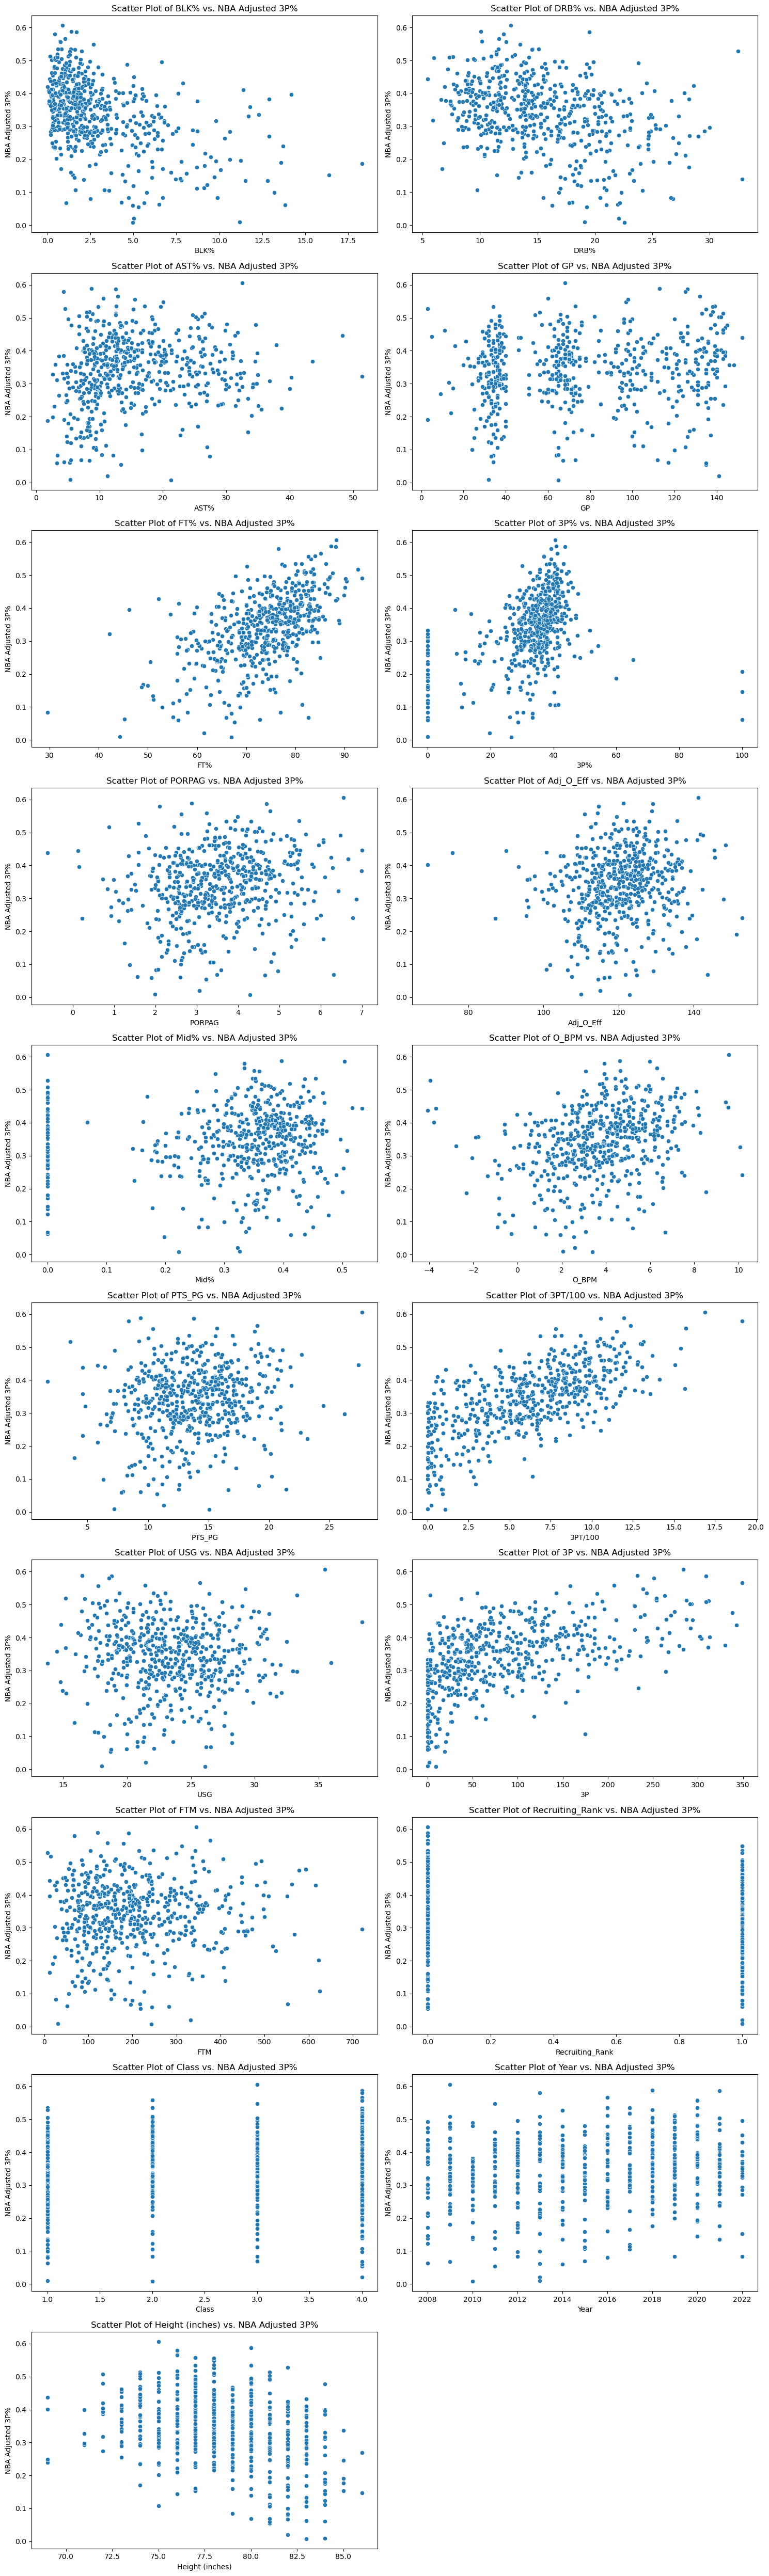

In [56]:
#Create scatter plots for each feature

def create_scatter_plots(df, target_variable):
    # Filter out non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    feature_names = [col for col in numeric_columns if col != target_variable]

    num_features = len(feature_names)
    num_rows = num_features // 2 + num_features % 2  # Calculate the number of rows for subplots
    num_cols = 2  # Two plots per row

    plt.figure(figsize=(15, 5 * num_rows))

    for i, feature in enumerate(feature_names):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.scatterplot(data=df, x=feature, y=target_variable)
        plt.title(f'Scatter Plot of {feature} vs. {target_variable}')
        
        # Calculate axis limits with a buffer
        x_min, x_max = df[feature].min() - 0.05 * (df[feature].max() - df[feature].min()), df[feature].max() + 0.05 * (df[feature].max() - df[feature].min())
        y_min, y_max = df[target_variable].min() - 0.05 * (df[target_variable].max() - df[target_variable].min()), df[target_variable].max() + 0.05 * (df[target_variable].max() - df[target_variable].min())
        
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        plt.xlabel(feature)
        plt.ylabel(target_variable)

    plt.tight_layout()
    plt.show()

# Example usage:
target_variable = 'NBA Adjusted 3P%'  # Replace with your target variable name
create_scatter_plots(df, target_variable)


In [57]:
# Features as X and target as y

features = df.drop(columns=['Player', 'Year', 'NBA Adjusted 3P%'])

X = features
y = df['NBA Adjusted 3P%'] 

features

,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,O_BPM,PTS_PG,3PT/100,USG,3P,FTM,Recruiting_Rank,Class,Height (inches)
0,0.098020,8.840594,30.983168,67.0,73.039593,39.041210,3.997094,121.921327,0.000000,5.522419,14.554416,9.557913,24.171287,130.0,194.0,1.0,4.0,74.0
1,2.200000,13.500000,6.800000,39.0,79.245283,44.654088,3.451450,126.405000,0.417700,5.878550,10.384600,9.819310,16.900000,71.0,42.0,1.0,1.0,78.0
2,3.400000,19.300000,13.000000,38.0,42.222222,35.555556,2.862280,115.064000,0.257100,2.890220,12.368400,2.350110,23.200000,16.0,76.0,1.0,1.0,80.0
3,0.697015,8.700000,26.320896,101.0,80.630261,42.382979,3.601087,118.915084,0.374307,3.382671,15.776115,7.716124,24.501493,180.0,311.0,0.0,3.0,73.0
4,2.333333,15.713333,8.980000,46.0,82.516189,40.453515,3.718164,119.014733,0.347233,3.444165,16.616640,11.912107,21.620000,119.0,118.0,0.0,2.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,9.800000,23.200000,4.400000,39.0,74.324324,47.619048,2.579370,130.931000,0.508500,2.581490,10.000000,1.747390,24.800000,10.0,110.0,1.0,1.0,84.0
555,0.800000,9.500000,12.600000,37.0,69.117647,37.500000,1.840980,110.171000,0.411800,2.461770,9.432400,8.061630,19.000000,48.0,47.0,1.0,1.0,77.0
556,3.300000,20.400000,5.800000,32.0,76.000000,29.411765,4.432070,127.459000,0.453700,2.735380,16.093800,0.988768,24.100000,5.0,152.0,1.0,1.0,83.0
557,2.200000,16.400000,16.400000,20.0,79.591837,29.113924,0.986946,95.641300,0.360000,-1.892370,10.700000,8.169930,25.800000,23.0,39.0,1.0,1.0,80.0


## Modeling

In this section, I performed my predictive modeling, aiming to forecast NBA three-point shooting percentages based on collegiate profiles.  The process began with a train-test split of our dataset, ensuring a robust framework for training our models and evaluating their predictive performance on unseen data. This step is fundamental to prevent data leakage and to simulate a real-world application of my model. I also created pipelines for each model, which included a StandardScaler to normalize our numerical features (there are no categorical features). I also used Grid Searching to try to improve my models' cross validation scores (on R-Squared and RMSE (Root Mean Squared Error)) by systematically searching for optimal hyperparameters. A dummy model that predicts the mean of the target was also used as a baseline to compare my results to.

In [58]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Impute values of zero in Mid% column after train-test split
# These became zeroes after aggregating rows 

mid_percent_mean_train = X_train[X_train['Mid%'] != 0]['Mid%'].mean()

X_train['Mid%'] = X_train['Mid%'].replace(0, mid_percent_mean_train)

X_test['Mid%'] = X_test['Mid%'].replace(0, mid_percent_mean_train)

### Dummy Model

I will start by creating a dummy model to start to compare each of my model's cross validation results to. The dummy model sets a foundational level of accuracy against which the predictive capabilities of more sophisticated models can be compared. The rationale behind using such a baseline is to provide context for the performance of our predictive models, as any model should aim to surpass this baseline to show its value.

In [60]:
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)  

y_pred_dummy = dummy_model.predict(X_test)


mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_train = r2_score(y_test, y_pred_dummy)
print(f'Dummy Model r-squared: {r2_train}')

print("Dummy Model MSE:", mse_dummy)
print("Dummy Model RMSE:", rmse_dummy)

Dummy Model r-squared: -0.04332316274173209
Dummy Model MSE: 0.008199145639350312
Dummy Model RMSE: 0.09054913384097228


### Linear Regression

The first predictive model I will look at is a Multiple Linear Regression with sklearn. This model assumes a linear relationship between the input features and the target variable. It is simple and will serve as a starting point for regression modeling.

In [61]:
#Creating a pipeline for our LR model
#With StandardScaler for normalizing our features

lr_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LinearRegression())  
])

In [62]:
#Fitting the training data

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [63]:
# Predict on the training set
y_train_pred = lr_pipe.predict(X_train)

# Compute MSE
mse_train = mean_squared_error(y_train, y_train_pred)

# Compute RMSE
rmse_train = np.sqrt(mse_train)

# Compute R-squared
r2_train = r2_score(y_train, y_train_pred)

# Get training score
training_score = lr_pipe.score(X_train, y_train)

cv_r2_scores = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='r2')  # You can adjust the number of folds as needed

# Compute MSE and RMSE for cross-validation
cv_mse_scores = -cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Average R-squared, MSE, and RMSE for cross-validation
average_cv_r2 = cv_r2_scores.mean()
average_cv_mse = cv_mse_scores.mean()
average_cv_rmse = cv_rmse_scores.mean()

print("R-squared on cross-validation data:", average_cv_r2)
print("MSE on cross-validation data:", average_cv_mse)
print("RMSE on cross-validation data:", average_cv_rmse)

print("MSE on training data:", mse_train)
print("RMSE on training data:", rmse_train)
print("R-squared on training data:", r2_train)

R-squared on cross-validation data: 0.5329328886979102
MSE on cross-validation data: 0.0052289513502148735
RMSE on cross-validation data: 0.07224602544097919
MSE on training data: 0.0047901357955320726
RMSE on training data: 0.06921080692732944
R-squared on training data: 0.5857504870486671


### Ridge Regression

Next, in an attempt to improve upon the Linear Regression model, I will try a Ridge Regression, a linear regression that includes regularization to avoid overfitting and multicollinearity by adding a penalty term to the coefficients.

In [64]:
# Ridge Regression Pipeline with StandardScaler

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('ridge', Ridge())  
])

In [65]:
#Creating a parameter grid for our GridSearchCV
#For ridge regression, this only includes alpha

ridge_param_grid = {
    'ridge__alpha': [24, 25, 26] 
}

In [66]:


grid_search = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [24, 25, 26]},
             scoring='neg_mean_squared_error')

In [67]:
ridge_best_model = grid_search.best_estimator_
ridge_best_params = grid_search.best_params_


# Get predictions on the training data
y_train_pred = ridge_best_model.predict(X_train)

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Get cross-validation scores
cv_scores = cross_val_score(ridge_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores  # Convert negative MSE scores to positive
r2_cv = cross_val_score(ridge_best_model, X_train, y_train, cv=5, scoring='r2')
rmse_cv = np.sqrt(mse_cv)

# Calculate average cross-validation scores
avg_mse_cv = np.mean(mse_cv)
avg_r2_cv = np.mean(r2_cv)
avg_rmse_cv = np.mean(rmse_cv)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print()

print("Training Metrics:")
print("MSE:", mse_train)
print("R-squared:", r2_train)
print("RMSE:", rmse_train)
print()

print("Cross-Validation Metrics:")
print("Average MSE:", avg_mse_cv)
print("Average R-squared:", avg_r2_cv)
print("Average RMSE:", avg_rmse_cv)


Best Parameters: {'ridge__alpha': 24}
Best Score: -0.005176666005838803

Training Metrics:
MSE: 0.004819895990115716
R-squared: 0.5831768343094044
RMSE: 0.06942547075905008

Cross-Validation Metrics:
Average MSE: 0.005176666005838803
Average R-squared: 0.5381640488128262
Average RMSE: 0.07186655821832466


The Ridge Regression resulted in slightly improved R-Squared and RMSE compared to our Linear Regression.

### Random Forest Regression

I will now move on to a Random Forest Regression, which is an ensemble method that builds multiple decision trees to improve prediction accuracy and control overfitting. Transitioning to it after Linear and Ridge Regression makes sense to potentially capture complex, nonlinear relationships and interactions between our college player features that linear models might not pick up on.

In [736]:
#Random Forest Pipeline with Standard Scaler

rf_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor()) 
])

I will use a grid search that will be updated to try to improve the model's hyperparameters and performance. This includes n_estimators which is the number of trees in my Random Forest, max_depth to control the model's complexity, min_samples_split and min_samples_leaf for preventing overfitting by specifying the minimum number of samples required to split and form new nodes, max_features to limit the number of features considered for each split, enhancing diversity among trees, and max_leaf_nodes to define the maximum number of terminal nodes. Overall, this tries to find the right balance between complexity and generalizability.

In [737]:
# Define hyperparameters grid for GridSearchCV

rf_param_grid = {

    'rf__n_estimators': [175, 180, 185, 190, 200, 210], 
    'rf__max_depth': [9, 10, 11, 12, 13, 14, 15, 16], 
    'rf__min_samples_split': [3, 4, 5, 6, 7],  
    'rf__min_samples_leaf': [1,2,3, 4],  
    'rf__max_features': [.25, .28, .3, .32, .35],  
    'rf__max_leaf_nodes': [None], 
}


In [738]:
#GridSearchCV for Random Forest

grid_search = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose = 1)

#Fit the training data

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [9, 10, 11, 12, 13, 14, 15, 16],
                         'rf__max_features': [0.25, 0.28, 0.3, 0.32, 0.35],
                         'rf__max_leaf_nodes': [None],
                         'rf__min_samples_leaf': [1, 2, 3, 4],
                         'rf__min_samples_split': [3, 4, 5, 6, 7],
                         'rf__n_estimators': [175, 180, 185, 190, 200, 210]},
             scoring='neg_mean_squared_error', verbose=1)

In [739]:

# Get best model and its metrics
rf_best_model = grid_search.best_estimator_
rf_best_params = grid_search.best_params_
rf_best_score = -grid_search.best_score_

# Calculate training set metrics using best_model
y_train_pred = rf_best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Get cross-validation scores
cv_scores_mse = -cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rmse = np.sqrt(cv_scores_mse)
cv_scores_r2 = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='r2')

# Calculate average cross-validation scores
avg_cv_score_mse = cv_scores_mse.mean()
avg_cv_score_rmse = cv_scores_rmse.mean()
avg_cv_score_r2 = cv_scores_r2.mean()

print("Training Set Metrics:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R-squared:", r2_train)
print("\nBest Model:")
print("Best Parameters:", rf_best_params)
print("Best Score (MSE):", rf_best_score)
print("\nCross-Validation Scores:")
print("Average CV MSE Score:", avg_cv_score_mse)
print("Average CV RMSE Score:", avg_cv_score_rmse)
print("Average CV R-squared Score:", avg_cv_score_r2)

Training Set Metrics:
MSE: 0.001659942536924893
RMSE: 0.04074239238096964
R-squared: 0.8564486651736024

Best Model:
Best Parameters: {'rf__max_depth': 9, 'rf__max_features': 0.3, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 175}
Best Score (MSE): 0.0055450162316131165

Cross-Validation Scores:
Average CV MSE Score: 0.005689902721836478
Average CV RMSE Score: 0.07522654793974021
Average CV R-squared Score: 0.49361074944339184


### Support Vector Regression

The next regression model I will use is a Support Vector Machine, which basically tries to predict the best curve that fits our data points. It tries to find a curve close to the data points without becoming overly complex. Therefore, it is a different approach to regression than a Random Forest, which is using the collective power of different decision trees. Moreover, I will use a 'kernel' hyperparameter to see if the SVR performs better as a linear of non-linear model.

In [68]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR()) 
])


For the SVR grid search, I have already mentioned the kernel hyperparamter to determine a linear or non-linear model. Other hyperparameters include C, which tries to balance accuracy and complexity by controlling the trade-off between the training error and the margin, epsilon sets the margin of tolerance where no penalty is given to errors (affecting the model's sensitivity), gamma defines the influence of individual training samples (with 'scale' auto-adjusting to data features and numerical values adjusting the complexity of the decision boundary).

In [69]:
svm_param_grid = {
    'svm__kernel': ['linear', 'rbf'], 
    'svm__C': [.005, .0051, .0052, .0053, .0054, .0055, .0056,.0057, .0058, .0059, .006 ],
    'svm__epsilon': [0.015,.016, .017, 0.018, .019, 0.02, .021, 0.022], 
    'svm__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
}


In [70]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_pipe, svm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1056 candidates, totalling 5280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVR())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.005, 0.0051, 0.0052, 0.0053, 0.0054,
                                    0.0055, 0.0056, 0.0057, 0.0058, 0.0059,
                                    0.006],
                         'svm__epsilon': [0.015, 0.016, 0.017, 0.018, 0.019,
                                          0.02, 0.021, 0.022],
                         'svm__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=1)

In [71]:
# Get the best model and parameters
svr_best_model = grid_search.best_estimator_
svr_best_params = grid_search.best_params_
svr_best_score = grid_search.best_score_


# Predict on the training set
y_pred_train = svr_best_model.predict(X_train)

# Evaluate performance on the training set
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mse_train = mean_squared_error(y_train, y_pred_train)

# Cross-validate
cv_scores = cross_val_score(svr_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
average_cv_rmse = np.sqrt(-cv_scores.mean())
average_cv_mse = -cv_scores.mean()
average_cv_r2 = cross_val_score(svr_best_model, X_train, y_train, cv=5, scoring='r2').mean()

# Print results
print("Best Model:", svr_best_model)
print("Best Parameters:", svr_best_params)
print("Best Score (MSE):", svr_best_score)
print("\nPerformance on Training Set:")
print("R-squared:", r2_train)
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("\nCross-Validation Scores:")
print("Average CV MSE Score:", average_cv_mse)
print("Average CV RMSE Score:", average_cv_rmse)
print("Average CV R-squared Score:", average_cv_r2)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVR(C=0.0056, epsilon=0.015, kernel='linear'))])
Best Parameters: {'svm__C': 0.0056, 'svm__epsilon': 0.015, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best Score (MSE): -0.005146334628393009

Performance on Training Set:
R-squared: 0.5809862117219902
RMSE: 0.06960766517480958
MSE: 0.004845227051088398

Cross-Validation Scores:
Average CV MSE Score: 0.005146334628393009
Average CV RMSE Score: 0.07173795807236925
Average CV R-squared Score: 0.540880962888977


### XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is an advanced form of gradient boosting (as the name suggests), that builds sequential models that correct the errors of previous ones. Trying XGBoost after models like SVM and Random Forest makes sense because it offers a powerful method for capturing complex patterns through ensemble learning, potentially improving prediction accuracy where simpler models or those with different learning strategies might fall short.

In [744]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor() )
])

The grid search for XGBoost includes tuning hyperparameters such as learnig_rate, which controls the step size at each iteration while moving toward a minimum of a loss function. Booster defines the type of model to run at each iteration, and we will tune for tree or linear model. Finally, alpha (lasso or L1) and lambda (ridge or L2) impose regularization terms on the weights. 

In [745]:
xgb_param_grid = {
    'xgb__learning_rate': [ 0.05, .052, 0.055, .058, .6, ],  
    'xgb__n_estimators': [140, 145, 150, 155, 160],
    'xgb__booster': ['gblinear'],  
    'xgb__reg_alpha': [0, .005], 
    'xgb__reg_lambda': [0, 0.01, .015, .02, .025]   
}


In [746]:
# Perform GridSearchCV
grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=Non...
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__booster': ['gblinear'],
                         'xgb__learning_rate': [0.05, 0.052, 0.055, 0.058, 0.6],
                         'xgb__n_estimators': [140, 145, 150, 155, 160],
                         'xgb__reg_alpha': [0, 0.005],
                         'xgb__reg_lambda': [0, 0.01, 0.015, 0.02, 0.025]},
             scoring='neg_mean_squared_error', verbose=1)

In [747]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Fit the best model to the training data
best_xgb_model.fit(X_train, y_train)

# Training scores
y_train_pred = best_xgb_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mse_train = mean_squared_error(y_train, y_train_pred)

# Print training scores
print("Training R^2:", r2_train)
print("Training RMSE:", rmse_train)
print("Training MSE:", mse_train)

cv_scores_r2 = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_rmse = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_rmse  # convert to positive values

# Compute the average scores
avg_cv_r2 = np.mean(cv_scores_r2)
avg_cv_rmse = np.sqrt(np.mean(cv_scores_mse))  # compute RMSE from MSE
avg_cv_mse = np.mean(cv_scores_mse)

# Print the average scores
print("Average CV R^2:", avg_cv_r2)
print("Average CV RMSE:", avg_cv_rmse)
print("Average CV MSE:", avg_cv_mse)

Best Parameters: {'xgb__booster': 'gblinear', 'xgb__learning_rate': 0.058, 'xgb__n_estimators': 140, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 0.025}
Best Score (MSE): -0.005170533723809408
Training R^2: 0.5825901187534526
Training RMSE: 0.06947431482924103
Training MSE: 0.004826680420992501
Average CV R^2: 0.5386571454763238
Average CV RMSE: 0.07190629091207333
Average CV MSE: 0.00517051467273172


### AdaBoost Regressor

Finally, I will use an AdaBoost Regression. AdaBoost, or Adaptive Boosting, applies the boosting technique to enhance regression models by sequentially fitting weak learner models, in this case Decision Tree Regressors, each correcting and weighting them to produce a powerful composite model. Trying AdaBoost after exploring both linear and non-linear models makes sense because it offers a different approach to enhancing model performance through boosting.

In [748]:
estimator = DecisionTreeRegressor()

ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('ada', AdaBoostRegressor(estimator=estimator)) 
])

The grid search for the AdaBoost model includes some of the hyperparameters I used in the XGBoost like n_estimators and learning_rate. It also includes a loss function (loss) to determine the loss function when updating weights. I also have tuned the decision tree estimator with many of the same hyperparamaters I used for the Random Forest Regressor.

In [749]:
ada_param_grid = {
    'ada__n_estimators': [235], 
    'ada__learning_rate': [0.5, .52, .55],  
    'ada__loss': ['exponential'], 
    'ada__estimator__max_depth': [10, 11, 12, 13, 14], 
    'ada__estimator__min_samples_split': [8, 9, 10], 
    'ada__estimator__min_samples_leaf': [10, 11, 12, 13],
    'ada__estimator__max_features': [.2, 0.21, .22],
    'ada__estimator__max_leaf_nodes': [None, 30],  
}


In [750]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_pipeline, ada_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs = -1)
grid_search.fit(X_train, y_train)  

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ada',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor()))]),
             n_jobs=-1,
             param_grid={'ada__estimator__max_depth': [10, 11, 12, 13, 14],
                         'ada__estimator__max_features': [0.2, 0.21, 0.22],
                         'ada__estimator__max_leaf_nodes': [None, 30],
                         'ada__estimator__min_samples_leaf': [10, 11, 12, 13],
                         'ada__estimator__min_samples_split': [8, 9, 10],
                         'ada__learning_rate': [0.5, 0.52, 0.55],
                         'ada__loss': ['exponential'],
                         'ada__n_estimators': [235]},
             scoring='neg_mean_squared_error', verbose=1)

In [751]:
# Get the best model and its parameters
ada_best_model = grid_search.best_estimator_
ada_best_params = grid_search.best_params_

# Get training scores
y_train_pred = ada_best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Get cross-validation scores
cv_rmse = np.sqrt(-grid_search.best_score_)
cv_mse = -grid_search.best_score_
cv_r2 = cross_val_score(ada_best_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print("Best Model:", ada_best_model)
print("Best Parameters:", ada_best_params)
print("Training RMSE:", train_rmse)
print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Average CV RMSE:", cv_rmse)
print("Average CV MSE:", cv_mse)
print("Average CV R^2:", np.mean(cv_r2))

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('ada',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=13,
                                                                   max_features=0.22,
                                                                   min_samples_leaf=11,
                                                                   min_samples_split=8),
                                   learning_rate=0.52, loss='exponential',
                                   n_estimators=235))])
Best Parameters: {'ada__estimator__max_depth': 13, 'ada__estimator__max_features': 0.22, 'ada__estimator__max_leaf_nodes': None, 'ada__estimator__min_samples_leaf': 11, 'ada__estimator__min_samples_split': 8, 'ada__learning_rate': 0.52, 'ada__loss': 'exponential', 'ada__n_estimators': 235}
Training RMSE: 0.044290195671085685
Training MSE: 0.0019616214325830572
Training R^2: 0.8303595643780353
Average CV RMSE: 0.07458468584818509
Average CV

## Evaluation

#### Choosing a Final Model

For choosing a final model, I evaluated each of my model's performance on cross valdiation using R-Squared and RMSE. R-squared quantifies the proportion of variance in the target variable (three-point shooting percentages) explained by the model, offering insight into the model's explanatory power and how well it captures the underlying pattern of the data. RMSE, on the other hand, measures the average magnitude of the model's prediction errors, providing a clear indication of the model's accuracy in predicting NBA three-point shooting percentages on a scale that is directly interpretable in the context of the target variable. By utilizing both R-squared and RMSE, I aim to assess not only how well the model fits the data overall but also how precise the individual predictions are, ensuring a comprehensive evaluation of the model's performance in forecasting NBA three-point shooting success.

Ultimately, the best model based on these metrics was the Support Vector Regression. One thing I noticed when evaluating each model on cross validation was that the linear-based models performed better and were less overfit, even after extensive grid searching and hyperparamater tuning, than the tree based models (Random Forest and AdaBoost). This could mean that the target was best predicted by the features most linear with it, and that complex relationships between the features were either not present or not as relevant in predicting NBA three-Point shooting. Additonally, the dataset I am working with is relatively small (559 rows), which could have made it more prone to overfitting to the training data due to the complexity of the tree-based models compared to the linear ones. 

After choosing my best model (Support Vector Regression), I evaluated the best model by predicting on the test set:

In [72]:
# Predict on the test set
y_pred_test = svr_best_model.predict(X_test)

# Evaluate performance on the test set
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mse_test = mean_squared_error(y_test, y_pred_test)

# Print results for the test set
print("SVR Performance on Test Set:")
print("R-squared:", r2_test)
print("RMSE:", rmse_test)
#print("MSE:", mse_test)

SVR Performance on Test Set:
R-squared: 0.4707621168881396
RMSE: 0.06449118211610459


#### Performance on Test Set

The performance of the SVR model on the test set, indicated by an R-squared value of 0.4708 and an RMSE of 0.0645, provides valuable insights into its predictive capabilities for the NBA three-point shooting. The R-squared value suggests that the model explains approximately 47% of the variance in three-point shooting percentages among NBA players based on their college profiles. While this demonstrates a moderate level of predictive power, indicating that the model captures a portion of the relationship between college performance and NBA three-point shooting, the R-squared is notably lower than what was observed during cross-validation. This discrepancy may suggest that the model, despite being the best among those tested, could be overfitting to the training data or that the cross-validation performance optimistically estimated the model's generalizability to unseen data.

However, the RMSE value, which measures the average deviation of the predicted three-point percentages from the actual values, is relatively low, signifying that the model's predictions are on average within about 6.45% of the adjusted three-point shooting percentages. The fact that the RMSE is better (lower) on the test set compared to the cross-validation performance indicates that the model is quite effective at making precise predictions, even if it doesn't capture all the variability in the data. This could be particularly valuable in a business context where making accurate predictions about a player's three-point shooting ability can inform scouting decisions, player evaluations, and team compositions.

#### Feature Importance

Feature Importance in the SVR Model was assessed through Coefficent Magnitude and Perumtation Feature performance.

##### Coefficient Magnitude

Coefficient magnitude importance in SVR reflects the weight each feature has in the model's prediction, indicating the relative influence of each variable on the outcome; larger absolute values signify greater importance. This method offers a direct, model-specific insight into feature relevance based on the linear combination used in the prediction. 

In [73]:
if svr_best_params['svm__kernel'] == 'linear':
    # Extract feature coefficients
    feature_importances = svr_best_model.named_steps['svm'].coef_.flatten()

# Map feature names to their importances
feature_importance_dict = dict(zip(X, feature_importances))

# Optionally, sort the features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print the feature names with their importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

FT%: 0.03500575076875835
3PT/100: 0.028695145909542974
3P: 0.019659506064195694
DRB%: 0.010163740631988957
O_BPM: 0.00989201604314436
USG: 0.008785501782828376
Mid%: 0.00814636488213494
GP: 0.006636198259887399
3P%: 0.00031934434738762685
Adj_O_Eff: -0.0007071707975887366
PTS_PG: -0.0050481461158636085
Height (inches): -0.007616273516119327
Recruiting_Rank: -0.007796126037771937
AST%: -0.009638418300443265
Class: -0.010200485105868635
PORPAG: -0.01145142677240742
FTM: -0.024546804404309057
BLK%: -0.02593650647961528


##### Permutation Feature Importance

I also used permutation feature importance, which assesses the impact of each feature on the model's accuracy by randomly shuffling individual feature values and observing the change in model performance. A significant decrease in model accuracy indicates high feature importance. 

In [74]:
# Perform permutation feature importance
perm_importance = permutation_importance(svr_best_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get importances
importances = perm_importance.importances_mean

# Assuming you have a list of feature names matching the columns of X_test
feature_names = X_test.columns

# Pair each feature name with its corresponding importance and sort them by importance
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for name, importance in sorted_features:
    print(f"{name}: {importance}")


FT%: 0.21687655900549876
FTM: 0.11028796585737614
3PT/100: 0.10552772284014927
AST%: 0.04983483676063352
BLK%: 0.04496811614012154
3P: 0.044347245784920095
DRB%: 0.03679878398980718
PORPAG: 0.033161711232215965
Class: 0.016484342726614323
USG: 0.014073879447628205
O_BPM: 0.013122929324180391
PTS_PG: 0.012639460783602452
GP: 0.010661633686220147
Recruiting_Rank: 0.008109634685522301
3P%: 0.0001155421149625894
Adj_O_Eff: -0.0003863233284033078
Height (inches): -0.0026926690959874285
Mid%: -0.007603514640950248


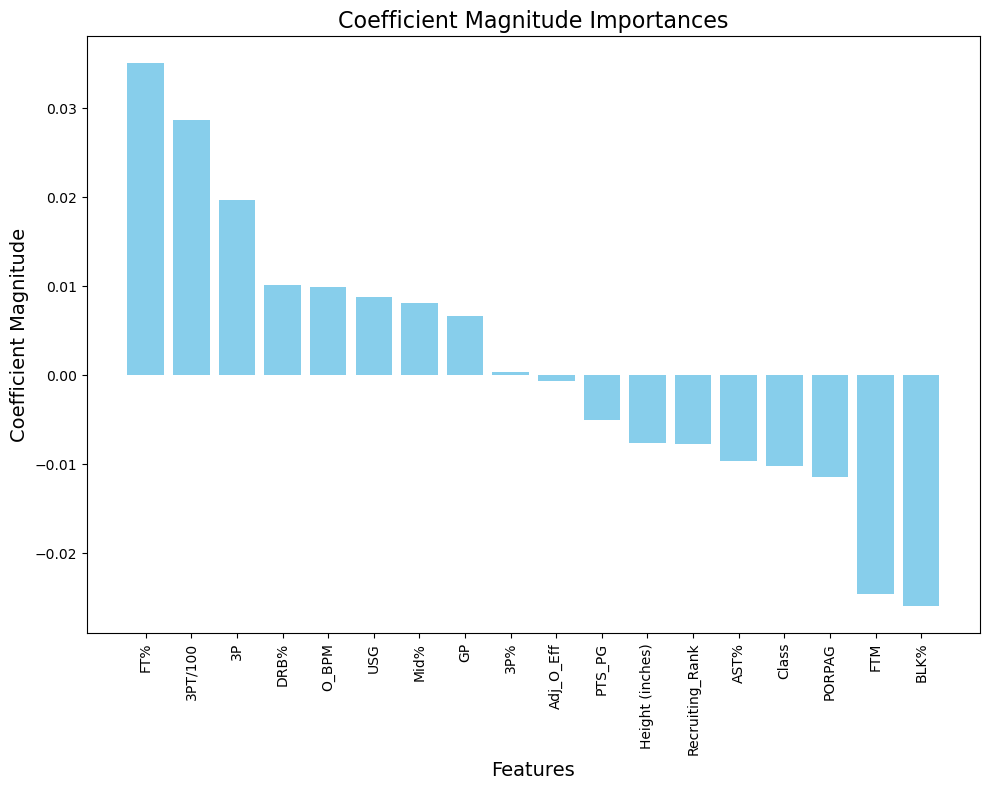

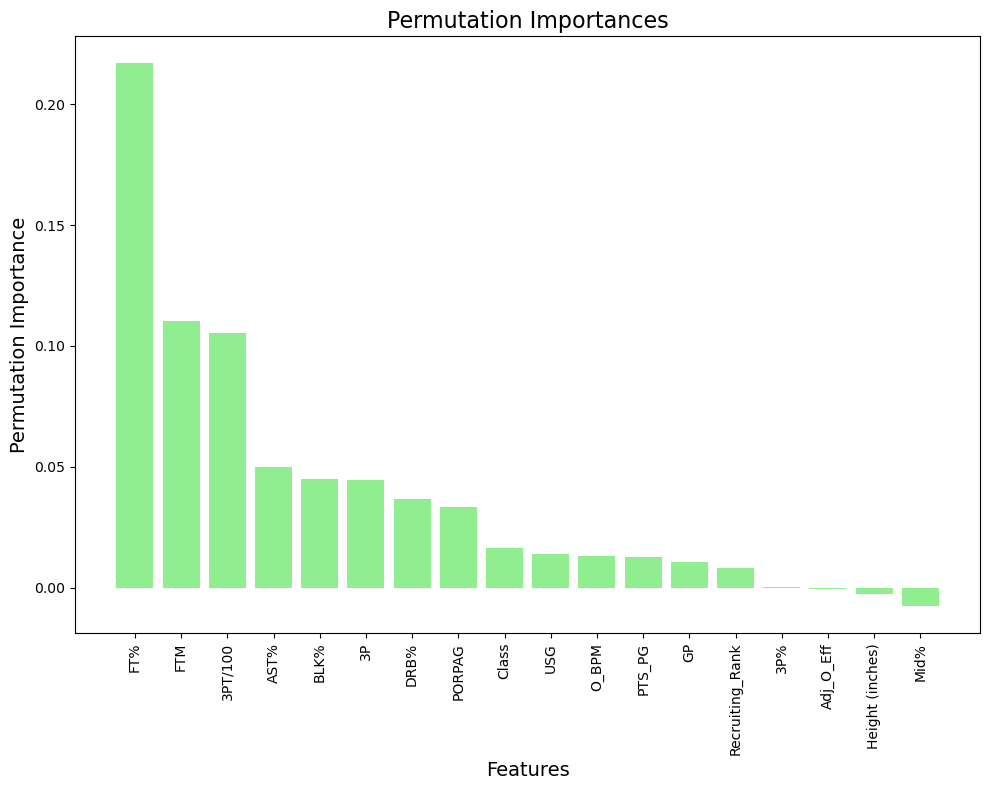

In [75]:
# Coefficient Magnitude Plot
features, coefs = zip(*sorted_feature_importance)  # Unpack your sorted (feature, importance) pairs
plt.figure(figsize=(10, 8))
plt.bar(features, coefs, color='skyblue')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Magnitude', fontsize=14)
plt.title('Coefficient Magnitude Importances', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Permutation Importance Plot
features, perms = zip(*sorted_features)  # Unpack your sorted (feature, importance) pairs for permutation importance
plt.figure(figsize=(10, 8))
plt.bar(features, perms, color='lightgreen')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Permutation Importances', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### Feature Importance Analysis

When assessing the coefficient magnitude and the permutation feature importance, FT% (free throw percentage), 3PT/100 (Three-Pointers per 100 Possessions), 3P (three pointers made) are consistently important predictors of NBA three-point shooting skill. This aligns with the previous discussion of three-point percentage alone not being as indiciative of three-point shooting skill as it might seem, as some players may be taking a higher volume of shots per possession and also may be taking more difficult shots as a byproduct of this. Additonally, players generally dont take that large a sample of three pointers during their college careers, so college three-point percentage is quite susceptible to noise, making it less reliable for predicting future performance. 

Free throw percentage (FT%), on the other hand, can be a better predictor for a few reasons. First, it shows how well a player can shoot when conditions are controlled - no defenders, same distance every time. So is also arguably as good at, if not better at, indiciating a player's overall 'shooting touch' than three-point percentage. Another factor is players usually take many more free throws in college than three pointers, and free throws are less prone to variance in general because they are higher-percentage shots, so this gives us a larger sample to work with and is a more reliable measure of a player’s shooting ability.

The stat 3PT/100 is also useful. It tells us not just how many threes a player makes, but how willing they are to take them. Good shooters are likely to shoot more threes, both because they themselves have been considered good shooters in the past (high school and team practices) and because their coaches set up plays for them to shoot from distance. Also, if a player is shooting more threes per possession, they’re probably taking more difficult shots too, rather than only shooting when they find themselves wide open. And it is also possibly true that shooting more often in games might indicate and/or lead to better shooting improvement and developement in the future. 

Overall, these findings show that how often players shoot and their free throw percentages might give us better clues about their future NBA three-point shooting than just their college three-point shooting percentage. This approach recognizes that predicting shooting skill is about more than just the percentage of three pointers a player makes; it's also about their overall shooting habits and how they fit into the game.


## Showcasing my Best Model's Performance on Current NBA Rookies and the Upcoming 2024 NBA Draft Class (as of February 14, 2024) 

### 2023 Rookie Class

In [77]:
ncaa_2023_class_df = pd.read_csv('Data/2023 ncaa class data.csv')

ncaa_2024_class_df = pd.read_csv('Data/2024 ncaa class data.csv')

nba_2023_class_df = pd.read_csv('Data/2023 rookies nba.csv')

In [79]:
#Rename the columns accordingly

nba_2023_class_df.rename(columns={'3PA': '3PA_Career'}, inplace=True)

nba_2023_class_df.rename(columns={'3PA.1': '3PA_100'}, inplace=True)

In [80]:
average_3pa_per_100

5.671549893842887

In [81]:
#Calculating volume-adjusted 3P%

nba_2023_class_df['Weighting Factor'] = nba_2023_class_df['3PA_100'] / average_3pa_per_100

alpha = .33  

nba_2023_class_df['Volume-Adjusted 3P%'] = nba_2023_class_df['3P%'] * (1 + alpha * (nba_2023_class_df['Weighting Factor'] - 1))

In [82]:
# Apply the weight calculation function to the df
nba_2023_class_df['Weight'] = nba_df.apply(calculate_weight, axis=1)

# Apply the adjusted 3P% calculation function to the DataFrame
nba_2023_class_df['Confidence and Volume-Adjusted 3P%'] = nba_2023_class_df.apply(calculate_adjusted_3P_percentage, axis=1)

#Any negative values become 0. Can't have a negative %, and any player who shot that poorly or infrequently should be treated the same.
nba_2023_class_df['Confidence and Volume-Adjusted 3P%'] = nba_2023_class_df['Confidence and Volume-Adjusted 3P%'].apply(lambda x: max(0, x))

sorted_confidence_threep_df = nba_2023_class_df.sort_values(by='Confidence and Volume-Adjusted 3P%', ascending=False)
sorted_confidence_threep_df = sorted_confidence_threep_df.reset_index(drop=True)
sorted_confidence_threep_df[['Player', 'Confidence and Volume-Adjusted 3P%', '3P%', '3PA_100', '3PA_Career']].head(20)

,Player,Confidence and Volume-Adjusted 3P%,3P%,3PA_100,3PA_Career
0,Nick Smith Jr.,0.555923,0.451,9.7,113
1,Jordan Hawkins,0.529248,0.381,12.4,247
2,Cam Whitmore,0.524707,0.403,12.1,119
3,Marcus Sasser,0.493017,0.431,8.2,130
4,GG Jackson II,0.480547,0.379,10.8,87
5,Brandon Miller,0.460915,0.384,9.3,276
6,Julian Strawther,0.442732,0.317,12.5,120
7,Cason Wallace,0.427886,0.409,6.5,149
8,Keyonte George,0.420514,0.333,10.2,243
9,Gradey Dick,0.403748,0.337,9.1,89


In [83]:
nba_2023_class_df.rename(columns={'Confidence and Volume-Adjusted 3P%': 'NBA Adjusted 3P%'}, inplace=True)

In [84]:
player_list = nba_2023_class_df['Player'].tolist()

In [85]:
player_list

['Nick Smith Jr.',
 'Marcus Sasser',
 'Cason Wallace',
 'Cam Whitmore',
 'Brandon Miller',
 'Anthony Black',
 'Jordan Hawkins',
 'GG Jackson II',
 'Andre Jackson Jr.',
 'Brandin Podziemski',
 'Gradey Dick',
 'Keyonte George',
 'Jaime Jaquez Jr.',
 'Kris Murray',
 'Julian Strawther',
 'Kobe Brown',
 'Toumani Camara',
 'Ben Sheppard',
 'Olivier-Maxence Prosper']

In [86]:
#Filtering my NCAA Player Data to only get players whose names match my NBA Data

ncaa_2023_filtered_df = ncaa_2023_class_df[ncaa_2023_class_df['Player'].isin(player_list)]

In [87]:
pd.set_option("display.max_rows", None)

In [88]:
#Checking to see how many times a player's name appears in my new dataset

ncaa_2023_filtered_df['Player'].value_counts()

Player
Brandon Miller             6
Toumani Camara             4
Kobe Brown                 4
Ben Sheppard               4
Marcus Sasser              4
Jaime Jaquez Jr.           4
Kris Murray                3
Andre Jackson Jr.          3
Olivier-Maxence Prosper    3
Julian Strawther           3
Anthony Black              2
Brandin Podziemski         2
Jordan Hawkins             2
Cason Wallace              1
Cam Whitmore               1
Nick Smith Jr.             1
Gradey Dick                1
Keyonte George             1
Name: count, dtype: int64

In [89]:
conditional_exclusions = {
    'Brandon Miller': ['Alabama'],
    'Anthony Black': ['Arkansas'],}
    
for player, teams in conditional_exclusions.items():
    ncaa_2023_filtered_df = ncaa_2023_filtered_df[~((ncaa_2023_filtered_df['Player'] == player) & ~ncaa_2023_filtered_df['Team'].isin(teams))]

In [90]:
ncaa_2023_filtered_df['Player'].value_counts()

Player
Toumani Camara             4
Kobe Brown                 4
Ben Sheppard               4
Marcus Sasser              4
Jaime Jaquez Jr.           4
Kris Murray                3
Andre Jackson Jr.          3
Olivier-Maxence Prosper    3
Julian Strawther           3
Jordan Hawkins             2
Brandin Podziemski         2
Brandon Miller             1
Anthony Black              1
Cason Wallace              1
Cam Whitmore               1
Nick Smith Jr.             1
Gradey Dick                1
Keyonte George             1
Name: count, dtype: int64

In [91]:

ncaa_2023_filtered_columns_df = ncaa_2023_filtered_df.drop(columns = ['Team', 'Conference', 'MPG', 'eFG%', '2P', '2PA', '2P%', 'FTR', 'Number', 'Foul_rate', 'ID', 'Hometown', 'A_TO_Rate', 'Rim_Made', 'Rim_Missed', 'Rim%', 'Dunks', 'Dunks_Attempts', 'Dunk%',
'Draft_Spot', 'DRTG', 'Adj_DRTG', 'D_PORPAG','stops', 'BPM', 'D_BPM', 'G_BPM', 'MPG.1', 'OG_BPM', 'DG_BPM', 'OREB_PG', 'DREB_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'TO%', 'Position_Advanced', 'Mid_Made', 'Mid_Missed', 'ORB%', 'STL%', 'ORtg', 'TS%'])

In [92]:
#Changing Class to Numerical value to later use as a numerical feature

class_mapping = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4}
ncaa_2023_filtered_columns_df['Class'] = ncaa_2023_filtered_columns_df['Class'].map(class_mapping)

In [93]:
# Handling our Null Values in Recruiting_Rank column
# We will assume the Null Values are for unranked high school prospects
# We will make the column binary based on if 
# player was highly ranked as a college recruit, which we will be defined by 90th percentile and higher recruits

ncaa_2023_filtered_columns_df['Recruiting_Rank'].fillna(0, inplace=True)

ncaa_2023_filtered_columns_df['Recruiting_Rank'] = ncaa_2023_filtered_columns_df['Recruiting_Rank'].apply(lambda rank: 1 if rank >= 90 else 0)

ncaa_2023_filtered_columns_df['Recruiting_Rank']

731      0
777      0
934      0
1010     0
1152     0
1572     0
1782     1
1953     0
2288     0
2586     0
2680     1
3900     1
3901     1
4109     1
4119     1
4578     1
4636     1
4743     1
6600     0
6653     0
6828     0
6936     0
7117     0
7649     0
7920     1
8125     0
8544     0
8903     0
9005     1
12179    0
12252    0
12463    0
12601    0
12825    0
13469    0
13810    0
13821    1
14617    0
18327    0
18403    0
18639    0
18772    0
19013    0
Name: Recruiting_Rank, dtype: int64

In [94]:
# Split the 'Height' column into 'Feet' and 'Inches' using the '-' delimiter
height_split = ncaa_2023_filtered_columns_df['Height'].str.split('-', expand=True)

# Create 'Feet' and 'Inches' columns
ncaa_2023_filtered_columns_df['Feet'] = height_split[0].astype(int)
ncaa_2023_filtered_columns_df['Inches'] = height_split[1].astype(int)

# Calculate the total height in inches and store it in a new column
ncaa_2023_filtered_columns_df['Height (inches)'] = ncaa_2023_filtered_columns_df['Feet'] * 12 + ncaa_2023_filtered_columns_df['Inches']

# Drop the original 'Height', 'Feet', and 'Inches' columns
ncaa_2023_filtered_columns_df = ncaa_2023_filtered_columns_df.drop(['Height', 'Feet', 'Inches'], axis=1)

# Display the resulting DataFrame
ncaa_2023_filtered_columns_df['Height (inches)']

731      80
777      79
934      80
1010     78
1152     74
1572     80
1782     78
1953     80
2288     79
2586     77
2680     77
3900     81
3901     79
4109     76
4119     79
4578     77
4636     80
4743     76
6600     80
6653     79
6828     80
6936     78
7117     74
7649     80
7920     78
8125     80
8544     79
8903     77
9005     77
12179    80
12252    78
12463    79
12601    78
12825    73
13469    80
13810    80
13821    78
14617    79
18327    80
18403    78
18639    79
18772    78
19013    73
Name: Height (inches), dtype: int64

In [95]:
ncaa_2023_filtered_columns_df['3P_U'] = ncaa_2023_filtered_columns_df['3P']
ncaa_2023_filtered_columns_df['FTM_U'] = ncaa_2023_filtered_columns_df['FTM']

In [96]:
ncaa_2023_filtered_columns_df['Final_Season_GP'] = ncaa_2023_filtered_columns_df.groupby('Player')['GP'].transform('first')
ncaa_2023_filtered_columns_df['Final_Season_3P'] = ncaa_2023_filtered_columns_df.groupby('Player')['3P'].transform('first')
ncaa_2023_filtered_columns_df['Final_Season_FTM'] = ncaa_2023_filtered_columns_df.groupby('Player')['FTM'].transform('first')

In [97]:
# Find players that appear more than once
players_to_duplicate = ncaa_2023_filtered_columns_df['Player'].value_counts()[ncaa_2023_filtered_columns_df['Player'].value_counts() > 1].index

# Create a DataFrame with the first row for each player to duplicate
first_rows_to_duplicate = ncaa_2023_filtered_columns_df[ncaa_2023_filtered_columns_df['Player'].isin(players_to_duplicate)].groupby('Player').head(1).copy()

# Concatenate the original DataFrame with the duplicated and modified first rows
ncaa_2023_filtered_columns_df = pd.concat([ncaa_2023_filtered_columns_df, first_rows_to_duplicate], ignore_index=True)

# Display the extended DataFrame
ncaa_2023_filtered_columns_df


,Player,GP,USG,DRB%,AST%,FTM,FTA,FT%,3P,3PA,...,Mid%,O_BPM,PTS_PG,3PT/100,Height (inches),3P_U,FTM_U,Final_Season_GP,Final_Season_3P,Final_Season_FTM
0,Toumani Camara,34,24.5,23.3,13.4,89,133,0.669,29,80,...,0.3882,3.497730,13.9412,4.92540,80,29,89,34,29,89
1,Jaime Jaquez Jr.,37,27.2,20.2,14.6,104,135,0.770,33,104,...,0.4146,4.416150,17.8108,5.04625,79,33,104,37,33,104
2,Kobe Brown,34,23.5,18.3,16.7,99,125,0.792,51,112,...,0.4000,6.730470,15.8235,6.39530,80,51,99,34,51,99
3,Ben Sheppard,31,26.8,15.4,16.7,86,124,0.694,79,190,...,0.3853,3.334680,18.8438,10.33010,78,79,86,31,79,86
4,Marcus Sasser,36,24.9,8.9,19.6,128,151,0.848,96,250,...,0.4000,6.805390,16.8333,13.90000,74,96,128,36,96,128
5,Kris Murray,29,25.6,17.8,11.7,86,118,0.729,66,197,...,0.3521,6.915950,20.2069,11.17920,80,66,86,29,66,86
6,Andre Jackson Jr.,36,16.5,16.7,26.6,31,48,0.646,25,89,...,0.3182,4.184830,6.6667,4.98193,78,25,31,36,25,31
7,Olivier-Maxence Prosper,36,19.8,12.3,4.0,111,151,0.735,39,115,...,0.3784,3.502830,12.5000,6.36001,80,39,111,36,39,111
8,Julian Strawther,36,20.6,19.6,6.7,103,130,0.792,79,195,...,0.4404,4.052950,15.2973,9.57836,79,79,103,36,79,103
9,Brandin Podziemski,31,25.5,21.0,20.8,111,144,0.771,80,179,...,0.4247,6.487120,19.8750,9.02729,77,80,111,31,80,111


In [98]:

# Define a list of columns to multiply by 'GP'
columns_to_multiply_sans_GP = ['BLK%', 'DRB%', 'AST%', 'FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'USG', 'FTA']

# Multiply the columns by 'GP'

for col in columns_to_multiply_sans_GP:
     ncaa_2023_filtered_columns_df[col] = ncaa_2023_filtered_columns_df[col] * ncaa_2023_filtered_columns_df['GP']
    
ncaa_2023_filtered_columns_df
    
aggregated_2023_ncaa_df = ncaa_2023_filtered_columns_df.groupby('Player').apply(aggregate_player_stats).reset_index()

aggregated_2023_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,Andre Jackson Jr.,229.4,2149.7,2789.7,121.0,84.474,34.033,234.004938,12815.9038,39.0177,...,5695.0,74.0,116.0,1.0,3.0,2023.0,78.0,36.0,31.0,25.0
1,Anthony Black,68.4,460.8,752.4,36.0,25.380,10.836,101.328840,3993.0840,11.4552,...,6840.0,28.0,134.0,1.0,1.0,2023.0,79.0,36.0,134.0,28.0
2,Ben Sheppard,96.9,2216.3,1940.3,151.0,103.009,53.637,386.050690,16242.6024,53.2903,...,12966.0,275.0,293.0,0.0,4.0,2023.0,78.0,31.0,86.0,79.0
3,Brandin Podziemski,80.6,1631.6,1507.2,78.0,59.802,31.410,341.865472,9780.2320,26.3314,...,8992.0,163.0,225.0,0.0,2.0,2023.0,77.0,31.0,111.0,80.0
4,Brandon Miller,88.8,654.9,469.9,37.0,31.783,14.208,182.613500,4872.0860,12.3321,...,6290.0,106.0,146.0,1.0,1.0,2023.0,81.0,37.0,146.0,106.0
5,Cam Whitmore,41.6,527.8,166.4,26.0,18.278,8.918,68.463200,2991.5080,7.8780,...,1664.0,37.0,45.0,1.0,1.0,2023.0,79.0,26.0,45.0,37.0
6,Cason Wallace,51.2,329.6,780.8,32.0,24.224,11.072,106.881600,3759.5520,12.2848,...,2240.0,44.0,53.0,1.0,1.0,2023.0,76.0,32.0,53.0,44.0
7,Gradey Dick,28.8,486.0,338.4,36.0,30.744,14.508,143.281080,4412.0160,11.9988,...,3204.0,83.0,76.0,1.0,1.0,2023.0,80.0,36.0,76.0,83.0
8,Jaime Jaquez Jr.,331.6,2924.6,2203.4,170.0,126.854,54.930,692.202140,20898.3520,72.1342,...,20232.0,149.0,437.0,0.0,4.0,2023.0,79.0,37.0,104.0,33.0
9,Jordan Hawkins,198.0,1109.7,785.0,101.0,87.805,37.703,369.456490,12680.2050,31.5335,...,11487.0,245.0,282.0,1.0,2.0,2023.0,77.0,37.0,125.0,109.0


In [99]:
aggregated_2023_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            18 non-null     object 
 1   BLK%              18 non-null     float64
 2   DRB%              18 non-null     float64
 3   AST%              18 non-null     float64
 4   GP                18 non-null     float64
 5   FT%               18 non-null     float64
 6   3P%               18 non-null     float64
 7   PORPAG            18 non-null     float64
 8   Adj_O_Eff         18 non-null     float64
 9   Mid%              18 non-null     float64
 10  O_BPM             18 non-null     float64
 11  PTS_PG            18 non-null     float64
 12  3PT/100           18 non-null     float64
 13  FTM               18 non-null     float64
 14  3PA               18 non-null     float64
 15  3P                18 non-null     float64
 16  USG               18 non-null     float64
 17 

In [100]:
columns_to_divide = ['BLK%', 'DRB%', 'AST%', 'FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'USG', 'FTA']
# Divide each statistic column by the total games played
for col in columns_to_divide:
    aggregated_2023_ncaa_df[col] = aggregated_2023_ncaa_df[col] / aggregated_2023_ncaa_df['GP']

aggregated_2023_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,Andre Jackson Jr.,1.895868,17.766116,23.055372,121.0,0.698132,0.281264,1.933925,105.916560,0.322460,...,47.066116,74.0,116.0,1.0,3.0,2023.0,78.0,36.0,31.0,25.0
1,Anthony Black,1.900000,12.800000,20.900000,36.0,0.705000,0.301000,2.814690,110.919000,0.318200,...,190.000000,28.0,134.0,1.0,1.0,2023.0,79.0,36.0,134.0,28.0
2,Ben Sheppard,0.641722,14.677483,12.849669,151.0,0.682179,0.355212,2.556627,107.566903,0.352916,...,85.867550,275.0,293.0,0.0,4.0,2023.0,78.0,31.0,86.0,79.0
3,Brandin Podziemski,1.033333,20.917949,19.323077,78.0,0.766692,0.402692,4.382891,125.387590,0.337582,...,115.282051,163.0,225.0,0.0,2.0,2023.0,77.0,31.0,111.0,80.0
4,Brandon Miller,2.400000,17.700000,12.700000,37.0,0.859000,0.384000,4.935500,131.678000,0.333300,...,170.000000,106.0,146.0,1.0,1.0,2023.0,81.0,37.0,146.0,106.0
5,Cam Whitmore,1.600000,20.300000,6.400000,26.0,0.703000,0.343000,2.633200,115.058000,0.303000,...,64.000000,37.0,45.0,1.0,1.0,2023.0,79.0,26.0,45.0,37.0
6,Cason Wallace,1.600000,10.300000,24.400000,32.0,0.757000,0.346000,3.340050,117.486000,0.383900,...,70.000000,44.0,53.0,1.0,1.0,2023.0,76.0,32.0,53.0,44.0
7,Gradey Dick,0.800000,13.500000,9.400000,36.0,0.854000,0.403000,3.980030,122.556000,0.333300,...,89.000000,83.0,76.0,1.0,1.0,2023.0,80.0,36.0,76.0,83.0
8,Jaime Jaquez Jr.,1.950588,17.203529,12.961176,170.0,0.746200,0.323118,4.071777,122.931482,0.424319,...,119.011765,149.0,437.0,0.0,4.0,2023.0,79.0,37.0,104.0,33.0
9,Jordan Hawkins,1.960396,10.987129,7.772277,101.0,0.869356,0.373297,3.657985,125.546584,0.312213,...,113.732673,245.0,282.0,1.0,2.0,2023.0,77.0,37.0,125.0,109.0


In [101]:
#Create Accurate 3P% and FT% columns
# Calculate 3P% (3-point percentage)
aggregated_2023_ncaa_df['3P%'] = (aggregated_2023_ncaa_df['3P'] / aggregated_2023_ncaa_df['3PA']) * 100

# Calculate FT% (free throw percentage)
aggregated_2023_ncaa_df['FT%'] = (aggregated_2023_ncaa_df['FTM'] / aggregated_2023_ncaa_df['FTA']) * 100

In [102]:
#This will get the correct games played
aggregated_2023_ncaa_df['GP'] = aggregated_2023_ncaa_df['GP'] - aggregated_2023_ncaa_df['Final_Season_GP']
aggregated_2023_ncaa_df['GP'] = aggregated_2023_ncaa_df.apply(lambda row: row['GP'] + row['Final_Season_GP'] if row['GP'] == 0 else row['GP'], axis=1)

aggregated_2023_ncaa_df['3P_U'] = aggregated_2023_ncaa_df['3P_U'] - aggregated_2023_ncaa_df['Final_Season_3P']
aggregated_2023_ncaa_df['3P_U'] = aggregated_2023_ncaa_df.apply(lambda row: row['3P_U'] + row['Final_Season_3P'] if row['3P_U'] == 0 else row['3P_U'], axis=1)

aggregated_2023_ncaa_df['FTM_U'] = aggregated_2023_ncaa_df['FTM_U'] - aggregated_2023_ncaa_df['Final_Season_FTM']
aggregated_2023_ncaa_df['FTM_U'] = aggregated_2023_ncaa_df.apply(lambda row: row['FTM_U'] + row['Final_Season_FTM'] if row['FTM_U'] == 0 else row['FTM_U'], axis=1)

aggregated_2023_ncaa_df


,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,Andre Jackson Jr.,1.895868,17.766116,23.055372,85.0,67.796313,29.425975,1.933925,105.916560,0.322460,...,47.066116,49.0,85.0,1.0,3.0,2023.0,78.0,36.0,31.0,25.0
1,Anthony Black,1.900000,12.800000,20.900000,36.0,70.526316,30.107527,2.814690,110.919000,0.318200,...,190.000000,28.0,134.0,1.0,1.0,2023.0,79.0,36.0,134.0,28.0
2,Ben Sheppard,0.641722,14.677483,12.849669,120.0,69.666821,38.256714,2.556627,107.566903,0.352916,...,85.867550,196.0,207.0,0.0,4.0,2023.0,78.0,31.0,86.0,79.0
3,Brandin Podziemski,1.033333,20.917949,19.323077,47.0,77.068505,44.295065,4.382891,125.387590,0.337582,...,115.282051,83.0,114.0,0.0,2.0,2023.0,77.0,31.0,111.0,80.0
4,Brandon Miller,2.400000,17.700000,12.700000,37.0,85.882353,38.405797,4.935500,131.678000,0.333300,...,170.000000,106.0,146.0,1.0,1.0,2023.0,81.0,37.0,146.0,106.0
5,Cam Whitmore,1.600000,20.300000,6.400000,26.0,70.312500,34.259259,2.633200,115.058000,0.303000,...,64.000000,37.0,45.0,1.0,1.0,2023.0,79.0,26.0,45.0,37.0
6,Cason Wallace,1.600000,10.300000,24.400000,32.0,75.714286,34.645669,3.340050,117.486000,0.383900,...,70.000000,44.0,53.0,1.0,1.0,2023.0,76.0,32.0,53.0,44.0
7,Gradey Dick,0.800000,13.500000,9.400000,36.0,85.393258,40.291262,3.980030,122.556000,0.333300,...,89.000000,83.0,76.0,1.0,1.0,2023.0,80.0,36.0,76.0,83.0
8,Jaime Jaquez Jr.,1.950588,17.203529,12.961176,133.0,74.742981,32.507344,4.071777,122.931482,0.424319,...,119.011765,116.0,333.0,0.0,4.0,2023.0,79.0,37.0,104.0,33.0
9,Jordan Hawkins,1.960396,10.987129,7.772277,64.0,88.047358,38.270745,3.657985,125.546584,0.312213,...,113.732673,136.0,157.0,1.0,2.0,2023.0,77.0,37.0,125.0,109.0


In [103]:
aggregated_2023_ncaa_df = aggregated_2023_ncaa_df.drop(columns = ['3PA', 'FTA', 'Final_Season_GP', 'Final_Season_3P', 'Final_Season_FTM', '3P', '3PA', 'FTM'])

In [104]:
aggregated_2023_ncaa_df = aggregated_2023_ncaa_df.rename(columns={'3P_U': '3P', 'FTM_U': 'FTM'})

In [105]:
# Combining our Aggregated NCAA df with the Adjusted 3P%
final_2023_df = pd.merge(aggregated_2023_ncaa_df, 
                     nba_2023_class_df[['Player', 'NBA Adjusted 3P%', '3PA_Career']], 
                     on='Player')
final_2023_df.rename(columns={'3PA_Career': 'NBA 3PA_Career'}, inplace=True)
final_2023_df


,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,3PT/100,USG,3P,FTM,Recruiting_Rank,Class,Year,Height (inches),NBA Adjusted 3P%,NBA 3PA_Career
0,Andre Jackson Jr.,1.895868,17.766116,23.055372,85.0,67.796313,29.425975,1.933925,105.916560,0.322460,...,4.530857,15.911570,49.0,85.0,1.0,3.0,2023.0,78.0,0.324672,38
1,Anthony Black,1.900000,12.800000,20.900000,36.0,70.526316,30.107527,2.814690,110.919000,0.318200,...,4.273170,22.200000,28.0,134.0,1.0,1.0,2023.0,79.0,0.332619,63
2,Ben Sheppard,0.641722,14.677483,12.849669,120.0,69.666821,38.256714,2.556627,107.566903,0.352916,...,9.318272,22.205960,196.0,207.0,0.0,4.0,2023.0,78.0,0.321143,62
3,Brandin Podziemski,1.033333,20.917949,19.323077,47.0,77.068505,44.295065,4.382891,125.387590,0.337582,...,9.455272,23.920513,83.0,114.0,0.0,2.0,2023.0,77.0,0.359088,141
4,Brandon Miller,2.400000,17.700000,12.700000,37.0,85.882353,38.405797,4.935500,131.678000,0.333300,...,12.516800,25.000000,106.0,146.0,1.0,1.0,2023.0,81.0,0.460915,276
5,Cam Whitmore,1.600000,20.300000,6.400000,26.0,70.312500,34.259259,2.633200,115.058000,0.303000,...,9.428570,24.300000,37.0,45.0,1.0,1.0,2023.0,79.0,0.524707,119
6,Cason Wallace,1.600000,10.300000,24.400000,32.0,75.714286,34.645669,3.340050,117.486000,0.383900,...,7.417140,20.300000,44.0,53.0,1.0,1.0,2023.0,76.0,0.427886,149
7,Gradey Dick,0.800000,13.500000,9.400000,36.0,85.393258,40.291262,3.980030,122.556000,0.333300,...,9.991250,19.200000,83.0,76.0,1.0,1.0,2023.0,80.0,0.403748,89
8,Jaime Jaquez Jr.,1.950588,17.203529,12.961176,133.0,74.742981,32.507344,4.071777,122.931482,0.424319,...,5.102905,23.204706,116.0,333.0,0.0,4.0,2023.0,79.0,0.311958,136
9,Jordan Hawkins,1.960396,10.987129,7.772277,64.0,88.047358,38.270745,3.657985,125.546584,0.312213,...,14.388424,22.325743,136.0,157.0,1.0,2.0,2023.0,77.0,0.529248,247


In [106]:
final_2023_df.columns

Index(['Player', 'BLK%', 'DRB%', 'AST%', 'GP', 'FT%', '3P%', 'PORPAG',
       'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'USG', '3P', 'FTM',
       'Recruiting_Rank', 'Class', 'Year', 'Height (inches)',
       'NBA Adjusted 3P%', 'NBA 3PA_Career'],
      dtype='object')

In [107]:
features_2023 = final_2023_df.drop(columns = ['Player', 'Year', 'NBA Adjusted 3P%','NBA 3PA_Career'])

predicted_3p_pct = svr_best_model.predict(features_2023)

In [108]:
rmse = np.sqrt(mean_squared_error(final_2023_df['NBA Adjusted 3P%'], predicted_3p_pct))
r_squared = r2_score(final_2023_df['NBA Adjusted 3P%'], predicted_3p_pct)


In [109]:

# Create a DataFrame to compare predicted and actual NBA adjusted 3P%
results_df = pd.DataFrame({
    'Player': final_2023_df['Player'],
    'Predicted NBA Adjusted 3P%': predicted_3p_pct,
    'Actual NBA Adjusted 3P%': final_2023_df['NBA Adjusted 3P%'],
    'NBA Career 3PA': final_2023_df['NBA 3PA_Career']
})

# Optionally, calculate and sort by prediction error to see which predictions were most and least accurate
results_df['Prediction Error'] = results_df['Predicted NBA Adjusted 3P%'] - results_df['Actual NBA Adjusted 3P%']
results_df_sorted = results_df.sort_values(by='Prediction Error', key=abs, ascending=True)

# Print overall model performance
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

# Display sorted results to review individual predictions
results_df_sorted

RMSE: 0.06893597724175538
R-squared: 0.42099168530641484


,Player,Predicted NBA Adjusted 3P%,Actual NBA Adjusted 3P%,NBA Career 3PA,Prediction Error
10,Julian Strawther,0.445951,0.442732,120,0.003219
0,Andre Jackson Jr.,0.314852,0.324672,38,-0.009820
14,Marcus Sasser,0.504705,0.493017,130,0.011688
4,Brandon Miller,0.448489,0.460915,276,-0.012426
17,Toumani Camara,0.299349,0.280410,127,0.018939
1,Anthony Black,0.303295,0.332619,63,-0.029324
8,Jaime Jaquez Jr.,0.341530,0.311958,136,0.029572
12,Kobe Brown,0.367216,0.329930,39,0.037286
7,Gradey Dick,0.444418,0.403748,89,0.040670
11,Keyonte George,0.465511,0.420514,243,0.044997


### 2024 NBA Draft Class 3-Point Shooting Projections

In [110]:
prospect_list = ["Ja’Kobe Walter", "Reed Sheppard", "Cody Williams", "Stephon Castle", "Rob Dillingham", "Robert Dillingham", "Kyle Filipowski", "Isaiah Collier", "Donovan Clinton", "Yves Missi", "Ryan Dunn", "Kevin McCullar", "Kel’el Ware", "Dalton Knecht", "Oso Ighodaro", "DJ Wagner", "Trey Alexander", "Tristan da Silva", "Zach Edey", "Tyrese Proctor", "Jared McCain", "Dillon Jones", "PJ Hall", "Tyler Kolek", "Akay Mitchell", "Justin Edwards", "Devin Carter", "Kwame Evans", "Pelle Larsson", "KJ Simpson", "Carlton Carrington", "Kylan Boswell", "Trevon Brazile", "Adem Bona", "Wooga Poplar", "Alex Karajan", "Jaxson Robinson", "Aaron Bradshaw", "Jaylon Tyson", "DaRon Holmes II", "Judah Mintz", "Tamin Lipsey", "Tristen Newton", "Baba Miller", "Harrison Ingram", "Kobe Johnson", "Dillon Mitchell", "Ryan Kalkbrenner", "Caleb Love", "Coleman Hawkins", "Matthew Cleveland", "Allen Flanigan", "Johnny Furphy", "DaRon Holmes", "Daron Holmes", "Daron Holmes II", "Kyshawn George", "Kevin McCullar Jr.", "Kwame Evans Jr.", "Tyler Kolek", "D.J. Wagner", "Hunter Sallis", "Terrence Shannon", "Terrence Shannon Jr.", "Anton Watson", "Bruce Thornton", "Mark Sears", "Nolan Hickman", "Jaedon Ledee", "JaKobe Walter", "LJ Cryer", "Layden Blocker", "Elmarko Jackson", "AJ Storr", "Malik Reneau", "Garwey Dual", "Riley Kugel", "Aden Holloway", "Roddy Gayle", "Micah Peavy", "Mackenzie Mgbako", "Truman Mark", "Tyler Thomas", "Kam Jones", "KJ Simpson", "K.J. Simpson", "A.J. Storr", "Alex Karaban", "Tristen Newton", "Matthew Murrell", "Hunter Dickinson", "Antonio Reeves", "Caleb Foster", "P.J. Hall", "PJ Hall", "Adama Bal", "Kanaan Caryle", "Xaivian Lee", "KyShawn George", "Jalen Bridges", "Ryan Nembhard", "Elliot Cadeau", "Baylor Scheierman", "Tucker DeVries", "Grant Nelson", "Milan Momcilovic", "Bronny James", "DJ Wagner", "D.J. Wagner", "Emanuel Miller", "Wade Taylor IV", "RJ Davis", "AJ Hoggard", "Johnell Davis", "David Jones", "Maxime Raynaud", "Johni Broome", "Isaiah Stevens", "Spencer Jones", "Kameron Jones", "Reece Beekman", "Jamal Shead", "Jonathan Mogbo", "Osasere Ighodaro", "Tristan Da Silva", "Keshad Johnson", "Terrence Shannon", "Kenneth Simpson", "Payton Sandfort", "Ugonna Onyenso", "JaKobe Walter", "Jakobe Walter"]


In [111]:
ncaa_2024_filtered_df = ncaa_2024_class_df[ncaa_2024_class_df['Player'].isin(prospect_list)]

In [112]:
ncaa_2024_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 158 to 24550
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             276 non-null    object 
 1   Team               276 non-null    object 
 2   Conference         276 non-null    object 
 3   GP                 276 non-null    int64  
 4   MPG                276 non-null    float64
 5   ORtg               276 non-null    float64
 6   USG                276 non-null    float64
 7   eFG%               276 non-null    float64
 8   TS%                276 non-null    float64
 9   ORB%               276 non-null    float64
 10  DRB%               276 non-null    float64
 11  AST%               276 non-null    float64
 12  TO%                276 non-null    float64
 13  FTM                276 non-null    int64  
 14  FTA                276 non-null    int64  
 15  FT%                276 non-null    float64
 16  2P                 276 non-

In [113]:
ncaa_2024_filtered_df['Player'].value_counts()

Player
Kobe Johnson            6
David Jones             6
Keshad Johnson          5
Baylor Scheierman       5
Antonio Reeves          5
Emanuel Miller          5
Isaiah Stevens          5
Tristen Newton          5
Tyler Thomas            5
Devin Carter            5
Anton Watson            5
Spencer Jones           5
Allen Flanigan          5
Matthew Murrell         4
RJ Davis                4
Grant Nelson            4
Johnell Davis           4
Hunter Dickinson        4
Tyler Kolek             4
Pelle Larsson           4
Micah Peavy             4
Reece Beekman           4
Zach Edey               4
Johni Broome            4
Mark Sears              4
Coleman Hawkins         4
Jalen Bridges           4
Terrence Shannon Jr.    4
Tristan da Silva        4
Caleb Love              4
Dillon Jones            4
PJ Hall                 4
Jaxson Robinson         4
Ryan Kalkbrenner        4
Jamal Shead             4
Oso Ighodaro            4
Dalton Knecht           3
Trevon Brazile          3
Hunte

In [114]:
conditional_exclusions = {
    'David Jones': ["St. John's", "Memphis", "DePaul"],
    'Kobe Johnson': ['USC'],
'Devin Carter': ['South Carolina', 'Providence'],}
    
for player, teams in conditional_exclusions.items():
    ncaa_2024_filtered_df = ncaa_2024_filtered_df[~((ncaa_2024_filtered_df['Player'] == player) & ~ncaa_2024_filtered_df['Team'].isin(teams))]

In [115]:
ncaa_2024_filtered_df['Player'].value_counts()

Player
Tristen Newton          5
Allen Flanigan          5
Spencer Jones           5
Anton Watson            5
Emanuel Miller          5
Tyler Thomas            5
Keshad Johnson          5
Isaiah Stevens          5
Antonio Reeves          5
Baylor Scheierman       5
Hunter Dickinson        4
Zach Edey               4
Reece Beekman           4
Micah Peavy             4
Pelle Larsson           4
Tyler Kolek             4
Johni Broome            4
Johnell Davis           4
Grant Nelson            4
RJ Davis                4
Mark Sears              4
David Jones             4
Matthew Murrell         4
Ryan Kalkbrenner        4
Oso Ighodaro            4
Jamal Shead             4
Jaxson Robinson         4
PJ Hall                 4
Coleman Hawkins         4
Caleb Love              4
Tristan da Silva        4
Dillon Jones            4
Terrence Shannon Jr.    4
Jalen Bridges           4
Devin Carter            3
Wooga Poplar            3
Matthew Cleveland       3
KJ Simpson              3
Payto

In [116]:

ncaa_2024_filtered_columns_df = ncaa_2024_filtered_df.drop(columns = ['Team', 'Conference', 'MPG', 'eFG%', '2P', '2PA', '2P%', 'FTR', 'Number', 'Foul_rate', 'ID', 'Hometown', 'A_TO_Rate', 'Rim_Made', 'Rim_Missed', 'Rim%', 'Dunks', 'Dunks_Attempts', 'Dunk%',
'Draft_Spot', 'DRTG', 'Adj_DRTG', 'D_PORPAG','stops', 'BPM', 'D_BPM', 'G_BPM', 'MPG.1', 'OG_BPM', 'DG_BPM', 'OREB_PG', 'DREB_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'TO%', 'Position_Advanced', 'Mid_Made', 'Mid_Missed', 'ORB%', 'STL%', 'ORtg', 'TS%'])

In [117]:
#Changing Class to Numerical value to later use as a numerical feature

class_mapping = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4}
ncaa_2024_filtered_columns_df['Class'] = ncaa_2024_filtered_columns_df['Class'].map(class_mapping)

In [118]:
# Handling our Null Values in Recruiting_Rank column
# We will assume the Null Values are for unranked high school prospects
# We will make the column binary based on if 
# player was highly ranked as a college recruit, which we will be defined by 90th percentile and higher recruits

ncaa_2024_filtered_columns_df['Recruiting_Rank'].fillna(0, inplace=True)

ncaa_2024_filtered_columns_df['Recruiting_Rank'] = ncaa_2024_filtered_columns_df['Recruiting_Rank'].apply(lambda rank: 1 if rank >= 90 else 0)

ncaa_2024_filtered_columns_df['Recruiting_Rank']

158      0
191      0
300      0
312      0
323      1
411      0
458      0
466      0
468      0
485      0
527      0
629      0
759      0
809      0
837      0
864      1
867      0
949      0
965      0
987      0
1012     0
1092     0
1132     0
1154     0
1183     1
1185     0
1214     0
1234     1
1262     0
1283     0
1298     1
1301     0
1368     0
1445     1
1546     0
1638     1
1639     0
1691     1
1781     0
1876     0
1982     0
2050     1
2073     1
2102     0
2190     0
2208     0
2242     0
2273     0
2302     0
2306     1
2316     0
2358     0
2386     1
2387     1
2395     0
2439     0
2753     1
2789     1
2821     1
2848     0
2878     0
2933     0
3084     1
3096     0
3099     0
3190     1
3218     1
3227     1
3284     0
3350     1
3394     0
3510     1
3654     1
3686     1
3755     1
3791     1
3934     0
4007     1
4013     0
4014     1
4047     1
4144     1
4296     1
4359     1
4392     1
4431     1
4498     1
4747     1
4790     1
4791     1
4792     1

In [119]:
ncaa_2024_filtered_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 158 to 24550
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           269 non-null    object 
 1   GP               269 non-null    int64  
 2   USG              269 non-null    float64
 3   DRB%             269 non-null    float64
 4   AST%             269 non-null    float64
 5   FTM              269 non-null    int64  
 6   FTA              269 non-null    int64  
 7   FT%              269 non-null    float64
 8   3P               269 non-null    int64  
 9   3PA              269 non-null    int64  
 10  3P%              269 non-null    float64
 11  BLK%             269 non-null    float64
 12  Class            269 non-null    int64  
 13  Height           268 non-null    object 
 14  PORPAG           269 non-null    float64
 15  Adj_O_Eff        269 non-null    float64
 16  Year             269 non-null    int64  
 17  Recruiting_Rank  

In [1282]:

# Assuming df is your DataFrame and 'column_name' is the name of the column you're interested in
nan_rows = ncaa_2024_filtered_columns_df[ncaa_2024_filtered_columns_df['Height'].isna()]

# Display the rows with NaN in 'column_name'
print(nan_rows)

              Player  GP   USG  DRB%  AST%  FTM  FTA   FT%  3P  3PA  ...  \
19486  Johnell Davis  19  17.2  14.8  11.0    6    8  0.75   4   15  ...   

       Class  Height    PORPAG Adj_O_Eff  Year  Recruiting_Rank  Mid%  \
19486      1     NaN  0.513617   103.402  2021                0   1.0   

         O_BPM  PTS_PG  3PT/100  
19486  1.65808  3.2174  5.52125  

[1 rows x 22 columns]


In [129]:
# Johnell Davis' height is not filled in for one of his seasons. We will replace this

ncaa_2024_filtered_columns_df.loc[ncaa_2024_filtered_columns_df['Player'] == 'Johnell Davis', 'Height'] = "6-4"

# Verify the change
print(ncaa_2024_filtered_columns_df[ncaa_2024_filtered_columns_df['Player'] == 'Johnell Davis'][['Player', 'Height']])

              Player Height
1301   Johnell Davis    6-4
7187   Johnell Davis    6-4
13436  Johnell Davis    6-4
19486  Johnell Davis    6-4


In [130]:
# Split the 'Height' column into 'Feet' and 'Inches' using the '-' delimiter
height_split = ncaa_2024_filtered_columns_df['Height'].str.split('-', expand=True)

# Create 'Feet' and 'Inches' columns
ncaa_2024_filtered_columns_df['Feet'] = height_split[0].astype(int)
ncaa_2024_filtered_columns_df['Inches'] = height_split[1].astype(int)

# Calculate the total height in inches and store it in a new column
ncaa_2024_filtered_columns_df['Height (inches)'] = ncaa_2024_filtered_columns_df['Feet'] * 12 + ncaa_2024_filtered_columns_df['Inches']

# Drop the original 'Height', 'Feet', and 'Inches' columns
ncaa_2024_filtered_columns_df = ncaa_2024_filtered_columns_df.drop(['Height', 'Feet', 'Inches'], axis=1)

# Display the resulting DataFrame
ncaa_2024_filtered_columns_df

,Player,GP,USG,DRB%,AST%,FTM,FTA,FT%,3P,3PA,...,Class,PORPAG,Adj_O_Eff,Year,Recruiting_Rank,Mid%,O_BPM,PTS_PG,3PT/100,Height (inches)
158,Kevin McCullar Jr.,21,27.2,15.7,22.8,106,131,0.809,34,92,...,4,4.928730,129.2860,2024,0,0.3067,5.069670,19.4545,7.105040,79
191,Emanuel Miller,23,22.7,13.2,16.0,87,109,0.798,22,54,...,4,4.684470,131.7690,2024,0,0.3580,5.531960,16.4783,4.105190,79
300,Allen Flanigan,23,27.1,18.1,18.0,104,127,0.819,12,40,...,4,3.487220,120.4890,2024,0,0.3723,2.196920,15.7391,3.191750,78
312,Spencer Jones,18,19.5,11.8,13.1,31,45,0.689,37,89,...,4,2.661130,116.9160,2024,0,0.3077,4.291110,11.5556,9.883740,79
323,Anton Watson,23,21.1,17.7,15.7,53,83,0.639,16,35,...,4,4.480220,131.0180,2024,1,0.4217,6.199210,14.8750,2.796350,80
411,Jalen Bridges,22,16.2,12.4,10.1,31,36,0.861,43,106,...,4,4.052770,129.2370,2024,0,0.2727,5.774230,10.6087,9.539120,81
458,Tyler Thomas,24,29.8,15.2,19.1,55,66,0.833,84,237,...,4,3.274080,113.5910,2024,0,0.4620,1.643590,21.8000,15.292900,75
466,Keshad Johnson,24,19.1,16.1,10.3,47,63,0.746,23,60,...,4,2.985070,122.5270,2024,0,0.4048,4.548990,11.3333,5.115790,79
468,Isaiah Stevens,22,26.9,8.4,41.5,59,73,0.808,37,86,...,4,5.060600,131.2070,2024,0,0.4741,5.638920,16.2917,6.701360,72
485,Terrence Shannon Jr.,17,26.3,10.7,13.5,106,134,0.791,38,111,...,4,5.437770,136.7160,2024,0,0.3939,6.549150,20.4706,11.104700,78


In [131]:
ncaa_2024_filtered_columns_df['3P_U'] = ncaa_2024_filtered_columns_df['3P']
ncaa_2024_filtered_columns_df['FTM_U'] = ncaa_2024_filtered_columns_df['FTM']

In [132]:
ncaa_2024_filtered_columns_df['Final_Season_GP'] = ncaa_2024_filtered_columns_df.groupby('Player')['GP'].transform('first')
ncaa_2024_filtered_columns_df['Final_Season_3P'] = ncaa_2024_filtered_columns_df.groupby('Player')['3P'].transform('first')
ncaa_2024_filtered_columns_df['Final_Season_FTM'] = ncaa_2024_filtered_columns_df.groupby('Player')['FTM'].transform('first')

In [133]:
# Find players that appear more than once
players_to_duplicate = ncaa_2024_filtered_columns_df['Player'].value_counts()[ncaa_2024_filtered_columns_df['Player'].value_counts() > 1].index

# Create a DataFrame with the first row for each player to duplicate
first_rows_to_duplicate = ncaa_2024_filtered_columns_df[ncaa_2024_filtered_columns_df['Player'].isin(players_to_duplicate)].groupby('Player').head(1).copy()

# Concatenate the original DataFrame with the duplicated and modified first rows
ncaa_2024_filtered_columns_df = pd.concat([ncaa_2024_filtered_columns_df, first_rows_to_duplicate], ignore_index=True)

# Display the extended DataFrame
ncaa_2024_filtered_columns_df


,Player,GP,USG,DRB%,AST%,FTM,FTA,FT%,3P,3PA,...,Mid%,O_BPM,PTS_PG,3PT/100,Height (inches),3P_U,FTM_U,Final_Season_GP,Final_Season_3P,Final_Season_FTM
0,Kevin McCullar Jr.,21,27.2,15.7,22.8,106,131,0.809,34,92,...,0.3067,5.069670,19.4545,7.105040,79,34,106,21,34,106
1,Emanuel Miller,23,22.7,13.2,16.0,87,109,0.798,22,54,...,0.3580,5.531960,16.4783,4.105190,79,22,87,23,22,87
2,Allen Flanigan,23,27.1,18.1,18.0,104,127,0.819,12,40,...,0.3723,2.196920,15.7391,3.191750,78,12,104,23,12,104
3,Spencer Jones,18,19.5,11.8,13.1,31,45,0.689,37,89,...,0.3077,4.291110,11.5556,9.883740,79,37,31,18,37,31
4,Anton Watson,23,21.1,17.7,15.7,53,83,0.639,16,35,...,0.4217,6.199210,14.8750,2.796350,80,16,53,23,16,53
5,Jalen Bridges,22,16.2,12.4,10.1,31,36,0.861,43,106,...,0.2727,5.774230,10.6087,9.539120,81,43,31,22,43,31
6,Tyler Thomas,24,29.8,15.2,19.1,55,66,0.833,84,237,...,0.4620,1.643590,21.8000,15.292900,75,84,55,24,84,55
7,Keshad Johnson,24,19.1,16.1,10.3,47,63,0.746,23,60,...,0.4048,4.548990,11.3333,5.115790,79,23,47,24,23,47
8,Isaiah Stevens,22,26.9,8.4,41.5,59,73,0.808,37,86,...,0.4741,5.638920,16.2917,6.701360,72,37,59,22,37,59
9,Terrence Shannon Jr.,17,26.3,10.7,13.5,106,134,0.791,38,111,...,0.3939,6.549150,20.4706,11.104700,78,38,106,17,38,106


In [134]:

# Define a list of columns to multiply by 'GP'
columns_to_multiply_sans_GP = ['BLK%', 'DRB%', 'AST%', 'FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'USG', 'FTA']

# Multiply the columns by 'GP'

for col in columns_to_multiply_sans_GP:
     ncaa_2024_filtered_columns_df[col] = ncaa_2024_filtered_columns_df[col] * ncaa_2024_filtered_columns_df['GP']
    
ncaa_2024_filtered_columns_df
    
aggregated_2024_ncaa_df = ncaa_2024_filtered_columns_df.groupby('Player').apply(aggregate_player_stats).reset_index()

aggregated_2024_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,AJ Storr,53.7,838.8,581.1,81.0,65.214,27.732,215.731380,9569.2590,28.4739,...,6744.0,98.0,214.0,0.0,2.0,2024.0,79.0,24.0,86.0,30.0
1,Aaron Bradshaw,64.0,224.0,32.0,16.0,9.376,4.000,30.623200,1909.4240,7.5296,...,464.0,3.0,17.0,1.0,1.0,2024.0,85.0,16.0,17.0,3.0
2,Adama Bal,65.9,867.2,1498.3,95.0,56.766,35.881,169.831912,10431.3360,42.2940,...,4950.0,98.0,174.0,1.0,3.0,2024.0,79.0,23.0,81.0,39.0
3,Adem Bona,746.5,1313.9,709.2,79.0,49.131,0.000,195.422290,9214.9330,26.4026,...,7536.0,0.0,185.0,1.0,2.0,2024.0,82.0,23.0,69.0,0.0
4,Aden Holloway,4.8,148.8,576.0,24.0,18.264,7.368,37.810560,2661.1200,3.1296,...,1104.0,43.0,35.0,1.0,1.0,2024.0,73.0,24.0,35.0,43.0
5,Alex Karaban,234.8,1107.7,803.3,85.0,71.663,34.170,340.910840,10727.6150,41.5536,...,3627.0,168.0,106.0,0.0,2.0,2024.0,80.0,23.0,34.0,51.0
6,Allen Flanigan,206.2,2566.6,2047.7,160.0,112.861,43.191,305.217403,16731.9259,60.6858,...,14716.0,117.0,427.0,0.0,4.0,2024.0,78.0,23.0,104.0,12.0
7,Anton Watson,388.2,2553.6,2196.3,161.0,100.823,46.235,514.961320,19985.6690,74.1391,...,13050.0,56.0,284.0,1.0,4.0,2024.0,80.0,23.0,53.0,16.0
8,Antonio Reeves,143.8,1580.2,1439.9,165.0,130.340,62.827,516.750610,19204.0050,72.5293,...,14050.0,336.0,408.0,0.0,4.0,2024.0,78.0,23.0,72.0,61.0
9,Baba Miller,327.1,1119.8,636.4,61.0,27.500,18.562,43.614430,5902.9120,28.7629,...,2450.0,45.0,53.0,0.0,2.0,2024.0,83.0,23.0,25.0,19.0


In [135]:
aggregated_2024_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            96 non-null     object 
 1   BLK%              96 non-null     float64
 2   DRB%              96 non-null     float64
 3   AST%              96 non-null     float64
 4   GP                96 non-null     float64
 5   FT%               96 non-null     float64
 6   3P%               96 non-null     float64
 7   PORPAG            96 non-null     float64
 8   Adj_O_Eff         96 non-null     float64
 9   Mid%              96 non-null     float64
 10  O_BPM             96 non-null     float64
 11  PTS_PG            96 non-null     float64
 12  3PT/100           96 non-null     float64
 13  FTM               96 non-null     float64
 14  3PA               96 non-null     float64
 15  3P                96 non-null     float64
 16  USG               96 non-null     float64
 17 

In [136]:
columns_to_divide = ['BLK%', 'DRB%', 'AST%', 'FT%', '3P%', 'PORPAG', 'Adj_O_Eff', 'Mid%', 'O_BPM', 'PTS_PG', '3PT/100', 'FTM', '3PA', '3P', 'USG', 'FTA']
# Divide each statistic column by the total games played
for col in columns_to_divide:
    aggregated_2024_ncaa_df[col] = aggregated_2024_ncaa_df[col] / aggregated_2024_ncaa_df['GP']

aggregated_2024_ncaa_df

,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,AJ Storr,0.662963,10.355556,7.174074,81.0,0.805111,0.342370,2.663350,118.139000,0.351530,...,83.259259,98.0,214.0,0.0,2.0,2024.0,79.0,24.0,86.0,30.0
1,Aaron Bradshaw,4.000000,14.000000,2.000000,16.0,0.586000,0.250000,1.913950,119.339000,0.470600,...,29.000000,3.0,17.0,1.0,1.0,2024.0,85.0,16.0,17.0,3.0
2,Adama Bal,0.693684,9.128421,15.771579,95.0,0.597537,0.377695,1.787704,109.803537,0.445200,...,52.105263,98.0,174.0,1.0,3.0,2024.0,79.0,23.0,81.0,39.0
3,Adem Bona,9.449367,16.631646,8.977215,79.0,0.621911,0.000000,2.473700,116.644722,0.334210,...,95.392405,0.0,185.0,1.0,2.0,2024.0,82.0,23.0,69.0,0.0
4,Aden Holloway,0.200000,6.200000,24.000000,24.0,0.761000,0.307000,1.575440,110.880000,0.130400,...,46.000000,43.0,35.0,1.0,1.0,2024.0,73.0,24.0,35.0,43.0
5,Alex Karaban,2.762353,13.031765,9.450588,85.0,0.843094,0.402000,4.010716,126.207235,0.488866,...,42.670588,168.0,106.0,0.0,2.0,2024.0,80.0,23.0,34.0,51.0
6,Allen Flanigan,1.288750,16.041250,12.798125,160.0,0.705381,0.269944,1.907609,104.574537,0.379286,...,91.975000,117.0,427.0,0.0,4.0,2024.0,78.0,23.0,104.0,12.0
7,Anton Watson,2.411180,15.860870,13.641615,161.0,0.626230,0.287174,3.198518,124.134590,0.460491,...,81.055901,56.0,284.0,1.0,4.0,2024.0,80.0,23.0,53.0,16.0
8,Antonio Reeves,0.871515,9.576970,8.726667,165.0,0.789939,0.380770,3.131822,116.387909,0.439572,...,85.151515,336.0,408.0,0.0,4.0,2024.0,78.0,23.0,72.0,61.0
9,Baba Miller,5.362295,18.357377,10.432787,61.0,0.450820,0.304295,0.714991,96.769049,0.471523,...,40.163934,45.0,53.0,0.0,2.0,2024.0,83.0,23.0,25.0,19.0


In [137]:
#Create Accurate 3P% and FT% columns
# Calculate 3P% (3-point percentage)
aggregated_2024_ncaa_df['3P%'] = (aggregated_2024_ncaa_df['3P'] / aggregated_2024_ncaa_df['3PA']) * 100

# Calculate FT% (free throw percentage)
aggregated_2024_ncaa_df['FT%'] = (aggregated_2024_ncaa_df['FTM'] / aggregated_2024_ncaa_df['FTA']) * 100

In [138]:
#This will get the correct games played
aggregated_2024_ncaa_df['GP'] = aggregated_2024_ncaa_df['GP'] - aggregated_2024_ncaa_df['Final_Season_GP']
aggregated_2024_ncaa_df['GP'] = aggregated_2024_ncaa_df.apply(lambda row: row['GP'] + row['Final_Season_GP'] if row['GP'] == 0 else row['GP'], axis=1)

aggregated_2024_ncaa_df['3P_U'] = aggregated_2024_ncaa_df['3P_U'] - aggregated_2024_ncaa_df['Final_Season_3P']
aggregated_2024_ncaa_df['3P_U'] = aggregated_2024_ncaa_df.apply(lambda row: row['3P_U'] + row['Final_Season_3P'] if row['3P_U'] == 0 else row['3P_U'], axis=1)

aggregated_2024_ncaa_df['FTM_U'] = aggregated_2024_ncaa_df['FTM_U'] - aggregated_2024_ncaa_df['Final_Season_FTM']
aggregated_2024_ncaa_df['FTM_U'] = aggregated_2024_ncaa_df.apply(lambda row: row['FTM_U'] + row['Final_Season_FTM'] if row['FTM_U'] == 0 else row['FTM_U'], axis=1)

aggregated_2024_ncaa_df


,Player,BLK%,DRB%,AST%,GP,FT%,3P%,PORPAG,Adj_O_Eff,Mid%,...,FTA,3P_U,FTM_U,Recruiting_Rank,Class,Year,Height (inches),Final_Season_GP,Final_Season_FTM,Final_Season_3P
0,AJ Storr,0.662963,10.355556,7.174074,57.0,81.761566,34.092635,2.663350,118.139000,0.351530,...,83.259259,68.0,128.0,0.0,2.0,2024.0,79.0,24.0,86.0,30.0
1,Aaron Bradshaw,4.000000,14.000000,2.000000,16.0,58.620690,25.000000,1.913950,119.339000,0.470600,...,29.000000,3.0,17.0,1.0,1.0,2024.0,85.0,16.0,17.0,3.0
2,Adama Bal,0.693684,9.128421,15.771579,72.0,81.575758,35.377723,1.787704,109.803537,0.445200,...,52.105263,59.0,93.0,1.0,3.0,2024.0,79.0,23.0,81.0,39.0
3,Adem Bona,9.449367,16.631646,8.977215,56.0,62.699045,0.000000,2.473700,116.644722,0.334210,...,95.392405,0.0,116.0,1.0,2.0,2024.0,82.0,23.0,69.0,0.0
4,Aden Holloway,0.200000,6.200000,24.000000,24.0,76.086957,30.714286,1.575440,110.880000,0.130400,...,46.000000,43.0,35.0,1.0,1.0,2024.0,73.0,24.0,35.0,43.0
5,Alex Karaban,2.762353,13.031765,9.450588,62.0,83.981252,40.202647,4.010716,126.207235,0.488866,...,42.670588,117.0,72.0,0.0,2.0,2024.0,80.0,23.0,34.0,51.0
6,Allen Flanigan,1.288750,16.041250,12.798125,137.0,75.455287,30.050160,1.907609,104.574537,0.379286,...,91.975000,105.0,323.0,0.0,4.0,2024.0,78.0,23.0,104.0,12.0
7,Anton Watson,2.411180,15.860870,13.641615,138.0,62.176245,32.357247,3.198518,124.134590,0.460491,...,81.055901,40.0,231.0,1.0,4.0,2024.0,80.0,23.0,53.0,16.0
8,Antonio Reeves,0.871515,9.576970,8.726667,142.0,80.476868,38.761920,3.131822,116.387909,0.439572,...,85.151515,275.0,336.0,0.0,4.0,2024.0,78.0,23.0,72.0,61.0
9,Baba Miller,5.362295,18.357377,10.432787,38.0,48.775510,31.238034,0.714991,96.769049,0.471523,...,40.163934,26.0,28.0,0.0,2.0,2024.0,83.0,23.0,25.0,19.0


In [139]:
aggregated_2024_ncaa_df = aggregated_2024_ncaa_df.drop(columns = ['3PA', 'FTA', 'Final_Season_GP', 'Final_Season_3P', 'Final_Season_FTM', '3P', '3PA', 'FTM'])

In [140]:
aggregated_2024_ncaa_df = aggregated_2024_ncaa_df.rename(columns={'3P_U': '3P', 'FTM_U': 'FTM'})

In [141]:
aggregated_2024_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           96 non-null     object 
 1   BLK%             96 non-null     float64
 2   DRB%             96 non-null     float64
 3   AST%             96 non-null     float64
 4   GP               96 non-null     float64
 5   FT%              96 non-null     float64
 6   3P%              94 non-null     float64
 7   PORPAG           96 non-null     float64
 8   Adj_O_Eff        96 non-null     float64
 9   Mid%             96 non-null     float64
 10  O_BPM            96 non-null     float64
 11  PTS_PG           96 non-null     float64
 12  3PT/100          96 non-null     float64
 13  USG              96 non-null     float64
 14  3P               96 non-null     float64
 15  FTM              96 non-null     float64
 16  Recruiting_Rank  96 non-null     float64
 17  Class            9

In [142]:
aggregated_2024_ncaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           96 non-null     object 
 1   BLK%             96 non-null     float64
 2   DRB%             96 non-null     float64
 3   AST%             96 non-null     float64
 4   GP               96 non-null     float64
 5   FT%              96 non-null     float64
 6   3P%              94 non-null     float64
 7   PORPAG           96 non-null     float64
 8   Adj_O_Eff        96 non-null     float64
 9   Mid%             96 non-null     float64
 10  O_BPM            96 non-null     float64
 11  PTS_PG           96 non-null     float64
 12  3PT/100          96 non-null     float64
 13  USG              96 non-null     float64
 14  3P               96 non-null     float64
 15  FTM              96 non-null     float64
 16  Recruiting_Rank  96 non-null     float64
 17  Class            9

In [143]:
aggregated_2024_ncaa_df = aggregated_2024_ncaa_df.fillna(0)

In [146]:
X_draft_2024 = aggregated_2024_ncaa_df.drop(columns = ['Player', 'Year'])

In [147]:
predicted_3p_pct = svr_best_model.predict(X_draft_2024)

In [148]:
aggregated_2024_ncaa_df['Predicted NBA Adjusted 3P%'] = predicted_3p_pct

In [149]:
draft_class_2024_sorted = aggregated_2024_ncaa_df.sort_values(by='Predicted NBA Adjusted 3P%', ascending=False)

In [150]:
for index, row in draft_class_2024_sorted.iterrows():
    print(f"{row['Player']}: {row['Predicted NBA Adjusted 3P%']}%")

Payton Sandfort: 0.5546394316911971%
Tyler Thomas: 0.5058834625991785%
LJ Cryer: 0.49840518825986824%
Baylor Scheierman: 0.48176529807552904%
Wade Taylor IV: 0.4763471249749195%
Jared McCain: 0.4691857663430828%
Jaxson Robinson: 0.46873872306742703%
Carlton Carrington: 0.4677598335099191%
Tucker DeVries: 0.46367196280868334%
Johnell Davis: 0.46298421060253087%
Alex Karaban: 0.45881944993625334%
Kam Jones: 0.45058986695249703%
Wooga Poplar: 0.44872260008159964%
Xaivian Lee: 0.4476920658999102%
Mackenzie Mgbako: 0.44686590691296096%
Kylan Boswell: 0.4464924938354856%
Antonio Reeves: 0.44634304519301704%
Aden Holloway: 0.4419392649370286%
Rob Dillingham: 0.43816011452108666%
RJ Davis: 0.4354262634364198%
Spencer Jones: 0.43271008276337447%
Nolan Hickman: 0.4311719474520698%
Milan Momcilovic: 0.4308372608381415%
Kyshawn George: 0.4299304634247021%
AJ Storr: 0.42886981028683835%
Tyrese Proctor: 0.4234450819017519%
Tyler Kolek: 0.42184570557543444%
Caleb Love: 0.420493182839177%
Adama Bal: 0

In [151]:
display(draft_class_2024_sorted[['Player', 'Predicted NBA Adjusted 3P%', 'FT%', '3PT/100','3P%']].head(20))


,Player,Predicted NBA Adjusted 3P%,FT%,3PT/100,3P%
68,Payton Sandfort,0.554639,89.000204,14.185736,36.582662
88,Tyler Thomas,0.505883,80.793574,12.683171,35.184267
55,LJ Cryer,0.498405,87.730318,11.792533,42.259325
10,Baylor Scheierman,0.481765,81.195184,10.281535,38.399144
91,Wade Taylor IV,0.476347,83.678741,14.062918,31.827077
37,Jared McCain,0.469186,82.500000,10.470900,38.211382
38,Jaxson Robinson,0.468739,79.659267,13.094632,35.125958
15,Carlton Carrington,0.467760,82.608696,10.855100,28.571429
86,Tucker DeVries,0.463672,81.532521,12.182137,35.199856
40,Johnell Davis,0.462984,85.553270,6.968686,40.449338


## Conclusion

In conclusion, as the NBA continues to evolve with a heightened emphasis on three-point shooting, the ability to accurately predict a player's long-range shooting potential from their college performance becomes increasingly valuable. Our best-performing model, the Support Vector Regression, showcases promising results with an R-squared of 0.4708 and an RMSE of 0.0645. While these figures, particularly the modest improvement of just over 2.5% in RMSE compared to the baseline Dummy Model, might not initially appear groundbreaking, they represent a significant step forward in the notoriously challenging task of predicting NBA three-point shooting ability based solely on a prospect's profile.

This level of predictive accuracy, when considering the complexities and variabilities inherent in shooting development and performance transition from college to the NBA, underscores the model's utility for NBA front offices. It suggests that, despite the inherent difficulties in such predictions, the insights gained from this model are substantial enough to merit consideration in the scouting and evaluation processes. The ability to outperform a mean-predicting model by a margin that, while seemingly small, is practically significant, highlights the potential of leveraging advanced analytics in complementing traditional scouting methods.

Therefore, even though the quest to perfectly predict three-point shooting capabilities from a player's college career remains a formidable challenge, the advancements demonstrated by our predictive modeling approach offer a compelling case for its integration into NBA team strategies. By equipping front offices with a more nuanced and unbiased tool for assessing shooting potential, this project contributes to the refinement of talent evaluation, which is crucial for building competitive rosters in an era where three-point shooting is not just an advantage but a necessity. Overall, this utilization of data-driven analysis to complement scouting expertise paves the way for more efficient and informed decision-making among NBA front offices.

## Next Steps

To improve our predictive modeling of NBA three-point shooting from prospect profiles, here are some potential next steps:

1. Refine the NBA Adjusted 3P% Target: Incorporate shot tracking and location data, along with off-the-dribble shooting statistics, for a more detailed representation of three-point shooting abilities by further accounting for shot difficulty.

2. Expand the Dataset: Try to incorporate international players and G-League Ignite prospects to reflect the NBA's growing talent sources, improving the model's comprehensiveness and applicability.

3. Explore Advanced Models: Implement neural networks and Stacking models to better capture complex relationships in the data, aiming for a combination of linear and non-linear model strengths.
